<h1 align='center'> 영상처리 프로그래밍 실습 6</h1>

<h6 align='right'> 2025. 4. 17. </h6>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름: 이선재  &nbsp;&nbsp;          학번: 20227123   &nbsp;&nbsp;         학과(전공): 빅데이터
    
</div>

- JupyterLab 문서의 최신 버전은 [JupyterLab Documentation](https://jupyterlab.readthedocs.io/en/stable/index.html#/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 제출 마감: 4월 23일 (수) 오후 10:00까지 최종본을 SmartLEAD제출


## 요약

- 히스토그램
- 감마 변환 기능 추가 (숙제)

## 문제 1. 
'bird.jpg'와 'tiger_in_forest.jpg' 파일을 읽고, 두 영상의 R, G, B 성분의 히스토그램을 두 개의 그래프로 표시하라.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import image_tools

img = image_tools.load_image('tiger_in_forest.jpg')

hist_R= [np.count_nonzero(img[:,: ,0] == n) for n in range(256)]
hist_G= [np.count_nonzero(img[ ... ,1] == n) for n in range(256)]
hist_B = [np.count_nonzero(img[ ... ,2] == n) for n in range(256)]

plt.plot(range(256), hist_R, 'r')
plt.plot(range(256), hist_G, 'g')
plt.plot(range(256), hist_B, 'b')
plt.show()

In [ ]:
hist_r, _= np.histogram(img[:,:, 0], bins=256, range=(0,256))
plt.plot(hist_r, 'r', label='r')

hist_g, _= np.histogram(img[:,:,1], bins=256, range=(0,256))
plt.plot(hist_g, 'g',label='g')

hist_b, _= np.histogram(img[:,:,2], bins=256, range=(0,256))
plt.plot(hist_b, 'b',label='b')
plt.legend()

NameError: name 'e' is not defined

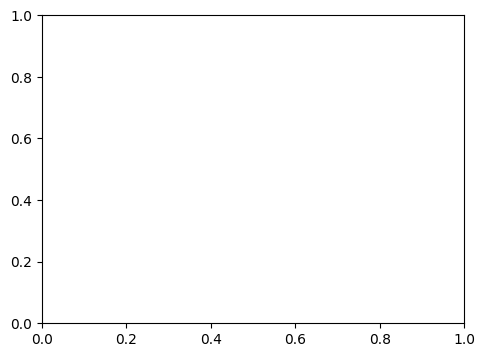

In [11]:
# def plot_histogram_of_an_image(filename):
#     img = image_tools.load_image(filename)
#     for i, color in enumerate(['r', 'g', 'b']):
#         hist, _= np.histogram(img[:, :, i], bins=256, range=(e, 256))
#     plt.plot(hist, color, label=color)
#     plt.legend()

# plt.figure(figsize=(12,4))
# plt.subplot(121)
# plot_histogram_of_an_image("tiger_in_forest.jpg")
# plt.subplot(122)
# plot_histogram_of_an_image('bird.jpg')

## 문제 2.
영상의 로그 변환은 다음과 같은 식으로 표현된다.

$$ g(x,y) = \frac{255}{\log(1+\max\{f(x,y)\}} \log\{1+f(x,y)\}$$

### 2.1 
로그 변환 함수의 그래프를 그려라. 단, 가로 축과 세로 축의 범위는 모두 [0, 255]로 한다.

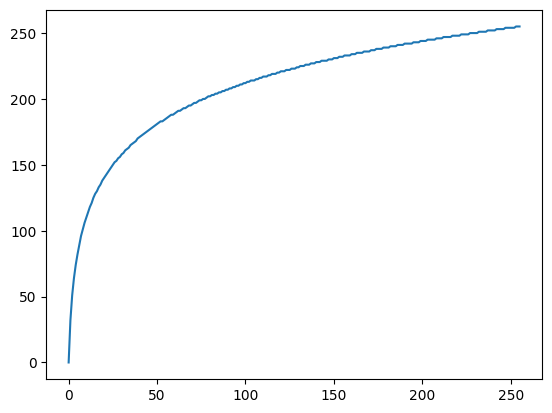

In [12]:
def log_transformation(f, f_max=255):
    C = 255 / np.log(1 + f_max)
    g=(C *np.log(1.+f)).round(0).clip(0,255).astype(np.uint8)
    return g

fig = plt.figure()
ax = fig.add_subplot(111)
r = np.arange(256)
s = log_transformation(r)
ax.plot(r, s)

### 2.2 

다음 URL에서 bird.jpg, forest.jpg, grass.jpg 파일을 로컬 드라이브에 다운로드하라.

https://drive.google.com/drive/u/0/folders/1zbjtkf9nHy9VniuLI4wHilbrN_JBvhYi



- 로컬 드라이브에사  bird.png, forest.jpg, grass.jpg 영상을 각각 읽고, 각 영상에 log 변환을 적용한 후에 원 영상과 변환 영상을 나란히 표시하라. (단, BGR 영상을 다음 몇 가지 color 공간으로 변환한 후에 특정 성분만 변환한 후에 다시 BGR 성분으로 변환하는 방법을 사용하라.)
  - RGB
  - Luv
  - Lab
  - YUV

- 위에서 사용한 변환 전 후 영상의 R, G, B 성분별 히스토그램을 비교하라.
- 단, Lookup table 방식을 이용하여 로그 변환 함수를 적용해야 한다.

C:\Users\Cansur\AppData\Local\Temp\ipykernel_3860\2025052701.py:2: RuntimeWarning: overflow encountered in scalar add
  C = 255 / np.log(1 + f_max)
C:\Users\Cansur\AppData\Local\Temp\ipykernel_3860\2025052701.py:2: RuntimeWarning: divide by zero encountered in log
  C = 255 / np.log(1 + f_max)


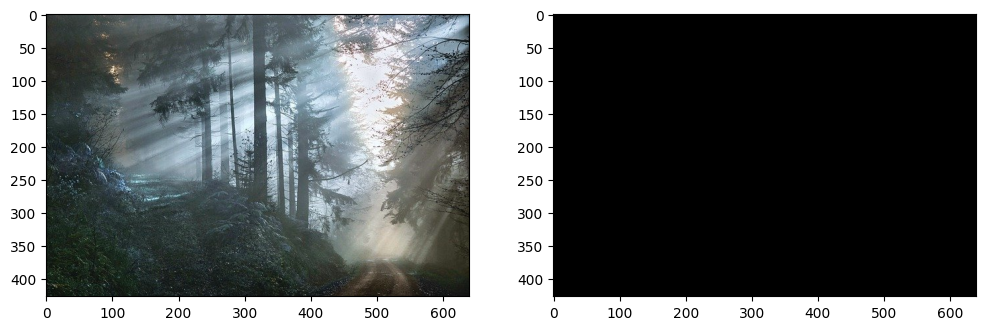

In [13]:
img = image_tools.load_image('forest.jpg')
img_log = np.empty_like(img)
img_max = img.max()
row, col, ch = img.shape
for r in range(row):
    for c in range(col):
        for x in range(ch):
            img_log[r,c,x]=log_transformation(img[r,c,x],img_max)
            
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img_log)
plt.show()

### 2.3 
- tiger_in_forest.jpg 영상에 log 변환을 적용한 후에 원 영상과 변환 영상을 나란히 표시하라. (단, BGR 영상을 다음 몇 가지 color 공간으로 변환한 후에 특정 성분만 변환한 후에 다시 BGR 성분으로 변환하는 방법도 사용하라.)
  - RGB
  - Luv
  - Lab
  - YUV

- 위에서 사용한 변환 전 후 영상의 R, G, B 성분별 히스토그램을 비교하라.

C:\Users\Cansur\AppData\Local\Temp\ipykernel_3860\2025052701.py:2: RuntimeWarning: overflow encountered in scalar add
  C = 255 / np.log(1 + f_max)
C:\Users\Cansur\AppData\Local\Temp\ipykernel_3860\2025052701.py:2: RuntimeWarning: divide by zero encountered in log
  C = 255 / np.log(1 + f_max)


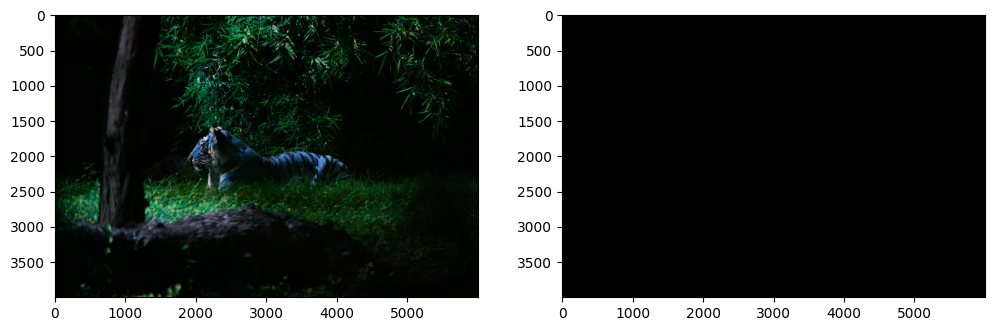

In [16]:
img = image_tools.load_image('tiger_in_forest.jpg')

img_log = log_transformation(img, img.max())

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img_log)
plt.show()

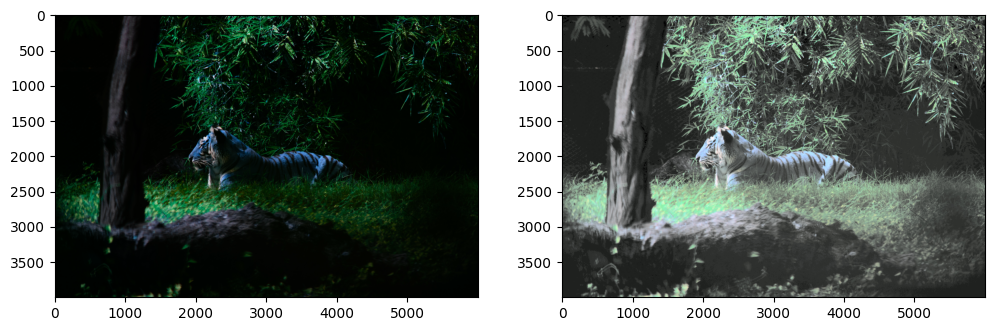

In [15]:
import cv2
img_Luv =cv2.cvtColor(img, cv2.COLOR_RGB2Luv)
img_Luv[ ... ,0] = log_transformation(img_Luv[ ... ,0])
img_Luv_log= cv2.cvtColor(img_Luv, cv2.COLOR_Luv2RGB)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img_Luv_log)
plt.show()

## 문제 3.

다음 프로그램을 따라해 보자.

### 3-1. 기본 골격 만들기

In [1]:
"""에러 나서 주석처리 """
import sys
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow
)

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()

app = QApplication([]) # 왜 배열로 받아?
viewer = BasicViewer() 
viewer.show()
sys.exit(app.exec_())

SystemExit: 0

C:\Users\Cansur\AppData\Roaming\Python\Python313\site-packages\IPython\core\interactiveshell.py:3557: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


주어진 코드는 PyQt5를 사용하여 간단한 GUI 애플리케이션 창을 만드는 Python 코드입니다. 코드를 한 줄씩 분석하며, 특히 `QApplication([])`에서 왜 빈 배열을 사용하는지에 초점을 맞춰 설명하겠습니다. 또한, 코드의 전반적인 구조와 각 구성 요소의 역할을 이해하기 쉽게 풀어서 설명합니다.

---

##### 결론
이 코드는 PyQt5를 사용한 최소한의 GUI 애플리케이션으로, 빈 창을 띄우고 이벤트 루프를 실행합니다. `QApplication([])`는 명령줄 인수를 처리하지 않는 간단한 설정이며, `sys.argv`로 대체하는 것이 더 표준적입니다. 오타(`sys,exit`)를 수정하고, 창 설정을 추가하면 더 나은 사용자 경험을 제공할 수 있습니다.

##### 코드 전체
```python
import sys
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow
)

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()

app = QApplication([])  # 왜 배열로 받아?
viewer = BasicViewer() 
viewer.show()
sys.exit(app.exec_())  # sys,exit은 오타로 보임, sys.exit로 수정 필요
```

이 코드는 PyQt5를 사용해 빈 `QMainWindow` 창을 띄우는 기본적인 GUI 애플리케이션입니다. 이제 각 부분을 단계별로 설명합니다.

---

##### 1. **모듈 임포트**
```python
import sys
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow
)
```
- **`sys`**: Python의 표준 라이브러리로, 시스템 관련 기능(예: 프로그램 종료, 명령줄 인수 처리 등)을 제공합니다. 여기서는 `sys.exit()`를 사용하여 애플리케이션 종료 상태를 관리합니다.
- **`PyQt5.QtWidgets`**: PyQt5는 크로스 플랫폼 GUI 프레임워크로, `QtWidgets` 모듈은 창, 버튼, 레이블 등 GUI 위젯을 제공합니다.
  - `QApplication`: PyQt5 애플리케이션의 핵심 객체로, 이벤트 루프와 애플리케이션 전반을 관리합니다.
  - `QMainWindow`: 기본 창을 생성하는 클래스입니다. 메뉴 바, 툴바, 상태 바 등을 추가할 수 있는 고급 창 구조를 제공합니다.

---

##### 2. **BasicViewer 클래스 정의**
```python
class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()
```
- **`BasicViewer` 클래스**:
  - `QMainWindow`를 상속하여 사용자 정의 창 클래스를 만듭니다.
  - 이 클래스는 기본적으로 빈 창을 생성하며, 추가적인 위젯(버튼, 레이블 등)이나 기능을 추가할 수 있는 기반을 제공합니다.
- **`__init__` 메서드**:
  - `super().__init__()`를 호출하여 부모 클래스(`QMainWindow`)의 초기화 메서드를 실행합니다.
  - 현재 코드에서는 추가적인 설정(예: 창 크기, 제목 등)이 없으므로 기본 `QMainWindow` 창이 생성됩니다.

---

##### 3. **QApplication 객체 생성**
```python
app = QApplication([])
```
- **`QApplication`**: PyQt5 애플리케이션의 진입점입니다. 모든 PyQt5 GUI 애플리케이션은 반드시 `QApplication` 객체를 하나 생성해야 합니다. 이 객체는 다음과 같은 역할을 합니다:
  - 이벤트 루프 관리: 마우스 클릭, 키보드 입력 등 사용자 이벤트를 처리합니다.
  - 애플리케이션 설정: 스타일, 폰트, 화면 해상도 등을 초기화합니다.
  - 창 간 통신: 여러 창 간의 상호작용을 조정합니다.

- **왜 `[]` (빈 리스트)를 전달하는가?**
  - `QApplication`의 생성자는 명령줄 인수(`sys.argv`)를 처리하기 위해 리스트를 받습니다. 이는 Qt가 C++로 작성되었으며, C++ 프로그램에서 `main(argc, argv)`처럼 명령줄 인수를 처리하는 방식에서 유래합니다.
  - PyQt5에서는 `QApplication`이 초기화될 때 명령줄 인수(예: `--style`, `--geometry`)를 처리할 수 있도록 설계되었습니다.
  - **`[]` (빈 리스트)**는 명령줄 인수를 전달하지 않겠다는 의미입니다. 즉, "이 애플리케이션은 명령줄 인수를 사용하지 않는다"고 명시적으로 지정하는 것입니다.
  - **대안**: 일반적으로 `sys.argv`를 전달하는 것이 표준 관행입니다:
    ```python
    app = QApplication(sys.argv)
    ```
    `sys.argv`는 Python 스크립트 실행 시 전달된 명령줄 인수(예: `python script.py --option`)를 포함합니다. 이를 사용하면 사용자가 터미널에서 추가 옵션을 전달할 수 있습니다.
  - **왜 빈 리스트를 사용할까?**
    - 간단한 애플리케이션에서는 명령줄 인수를 처리할 필요가 없으므로, `[]`를 사용해 불필요한 인수 처리를 생략할 수 있습니다.
    - 테스트나 최소 예제에서 간결함을 위해 사용되기도 합니다.
    - 그러나 `sys.argv`를 사용하는 것이 더 안전하고 표준적이므로, 실제 애플리케이션에서는 `sys.argv`를 권장합니다.

- **주의사항**:
  - `QApplication` 객체는 애플리케이션에서 단 하나만 존재해야 합니다.
  - 빈 리스트(`[]`)를 사용해도 대부분의 경우 문제없이 작동하지만, 특정 Qt 기능(예: 스타일 설정, 디버깅 옵션)이 명령줄 인수에 의존한다면 `sys.argv`를 사용하는 것이 더 적합합니다.

---

##### 4. **BasicViewer 객체 생성 및 창 표시**
```python
viewer = BasicViewer()
viewer.show()
```
- **`viewer = BasicViewer()`**:
  - `BasicViewer` 클래스의 인스턴스를 생성하여 `viewer`라는 이름의 창 객체를 만듭니다.
  - 이 시점에서 창은 메모리에 생성되었지만 아직 화면에 표시되지 않습니다.
- **`viewer.show()`**:
  - `show()` 메서드를 호출하여 창을 화면에 표시합니다.
  - 이 메서드는 창을 가시화하고, 사용자가 창을 볼 수 있도록 렌더링합니다.

---

##### 5. **애플리케이션 실행 및 종료**
```python
sys,exit(app.exec_())  # 오타: sys,exit -> sys.exit
```
- **`app.exec_()`**:
  - `QApplication`의 `exec_()` 메서드는 애플리케이션의 **이벤트 루프**를 시작합니다.
  - 이벤트 루프는 사용자 입력(마우스 클릭, 키보드 입력 등)을 처리하고, 창의 상태를 업데이트하며, 애플리케이션이 종료될 때까지 실행됩니다.
  - `exec_()`는 애플리케이션이 종료될 때(예: 창을 닫거나 `sys.exit` 호출 시) 정수 상태 코드를 반환합니다(0은 정상 종료, 그 외는 오류를 나타냄).
- **`sys.exit()`**:
  - `sys.exit()`는 Python 프로그램을 종료하며, `app.exec_()`의 반환값(상태 코드)을 운영 체제에 전달합니다.
  - 이를 통해 프로그램이 정상적으로 종료되었는지, 또는 오류가 발생했는지를 운영 체제에 알립니다.
  - 예를 들어, 사용자가 창을 닫으면 `app.exec_()`가 0을 반환하고, `sys.exit(0)`이 호출되어 프로그램이 정상 종료됩니다.

---

##### 코드의 동작 흐름
1. `QApplication([])`: 애플리케이션 객체를 생성하고, 이벤트 루프를 준비합니다.
2. `BasicViewer()`: `QMainWindow`를 상속한 빈 창 객체를 생성합니다.
3. `viewer.show()`: 창을 화면에 표시합니다.
4. `app.exec_()`: 이벤트 루프를 시작하여 사용자의 입력을 처리합니다(예: 창 닫기).
5. `sys.exit()`: 이벤트 루프가 종료되면 프로그램을 종료합니다.

실행 결과, 빈 `QMainWindow` 창이 화면에 나타나며, 사용자가 창을 닫으면 프로그램이 종료됩니다.

---

##### 오타 수정 및 개선된 코드
```python
import sys
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow
)

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Basic Viewer")  # 창 제목 추가
        self.setGeometry(100, 100, 800, 600)  # 창 위치와 크기 설정

app = QApplication(sys.argv)  # sys.argv로 변경
viewer = BasicViewer()
viewer.show()
sys.exit(app.exec_())
```
- **개선점**:
  - `[]` → `sys.argv`로 변경하여 표준적인 명령줄 인수 처리를 사용.
  - 창 제목(`setWindowTitle`)과 크기(`setGeometry`)를 설정하여 사용자 경험을 개선.

---

##### 추가 질문에 대한 답변
> **왜 배열로 받아?**
- `QApplication`은 명령줄 인수를 처리하기 위해 리스트를 받습니다. `[]`는 "명령줄 인수 없음"을 의미하며, 간단한 애플리케이션에서 사용됩니다.
- 실제로는 `sys.argv`를 전달하는 것이 더 일반적이고 안전합니다. `sys.argv`는 스크립트 실행 시 전달된 인수(예: `python script.py --style=fusion`)를 포함하며, Qt가 이를 처리해 애플리케이션 동작을 조정할 수 있습니다.

---

##### 추가 학습 포인트
1. **PyQt5의 이벤트 루프**:
   - `app.exec_()`는 애플리케이션의 핵심으로, GUI가 사용자 입력에 반응하도록 만듭니다.
   - 이벤트 루프가 없으면 창이 즉시 닫히거나 응답하지 않을 수 있습니다.
2. **QMainWindow 커스터마이징**:
   - `QMainWindow`에 메뉴 바, 툴바, 중앙 위젯 등을 추가할 수 있습니다. 예:
     ```python
     self.setCentralWidget(QLabel("Hello, PyQt5!"))
     ```
3. **명령줄 인수 활용**:
   - `sys.argv`를 사용하면 `--style` 같은 Qt 옵션을 통해 애플리케이션 스타일을 변경할 수 있습니다:
     ```bash
     python script.py --style fusion
     ```

---

##### 디버깅 및 문제 해결
- **창이 표시되지 않는 경우**:
  - PyQt5가 제대로 설치되었는지 확인: `pip install PyQt5`
  - 백엔드 호환성 문제일 수 있으므로, `matplotlib` 등 다른 GUI 라이브러리와 충돌하지 않는지 확인.
- **오류 메시지**:
  - 코드를 실행했을 때 특정 오류(예: `ModuleNotFoundError`, `AttributeError`)가 발생하면 공유해 주세요.
- **환경 차이**:
  - 이전 질문에서 언급한 "다른 컴퓨터에서 작동"과 관련해, PyQt5 버전이나 OS 차이가 문제를 일으킬 수 있습니다. `pip show PyQt5`로 버전을 확인하세요.

---

### 3.2:  
1. 창을 닫는 방법은 뭘까?
2. Juputer notebook 환경에서 창을 답으면 왜 이런 메시지가 나타날까? 이 메시지가 나타나지 않게 하려면?

In [ ]:
import sys
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow
)

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()


viewer = BasicViewer()
viewer.show()
# 추가된 코드
try:
    sys.exit(app.exec_())
except SystemExit:
    pass

주어진 코드는 이전 코드와 비교했을 때 몇 가지 추가된 부분이 있습니다. 여기서는 새로 추가되거나 변경된 부분에만 초점을 맞춰 간결하게 설명하겠습니다. 추가된 부분은 `try-except` 블록입니다.

---
##### 결론
- **`try-except`**: `SystemExit` 예외를 처리하여 프로그램 종료를 더 안정적으로 만듦.

##### 추가된/변경된 부분 설명

1. **`try-except` 블록으로 `sys.exit` 처리**
   ```python
   try:
       sys.exit(app.exec_())
   except SystemExit:
       pass
   ```
   - **`try: sys.exit(app.exec_())`**:
     - `app.exec_()`는 애플리케이션의 이벤트 루프를 실행하며, 종료 시 상태 코드를 반환합니다.
     - `sys.exit()`는 이 상태 코드를 받아 프로그램을 종료합니다.
   - **`except SystemExit: pass`**:
     - `sys.exit()`는 `SystemExit` 예외를 발생시켜 프로그램을 종료합니다.
     - 이 예외를 `try-except` 블록으로 처리하여, `SystemExit`가 발생해도 프로그램이 비정상적으로 종료되지 않고 조용히 종료되도록 합니다.
     - `pass`는 예외를 무시하고 추가 작업 없이 종료를 허용합니다.
   - **이전 코드와의 차이**:
     - 이전에는 `sys.exit(app.exec_())`를 직접 호출하여 예외 처리가 없었습니다.
     - `try-except`를 추가함으로써 종료 과정이 더 안정적이고, 특정 환경(예: Jupyter Notebook)에서 `SystemExit`로 인한 오류를 방지할 수 있습니다.

---

#### Q: 
창을 닫은 후 위 프로그램을 다시 실행하면 어떤 문제가 발생하나? 이 문제를 해결하려면?

In [ ]:
app = QApplication.instance()
if app is None:
    app = QApplication([])
viewer = BasicViewer()
viewer.show()
try:
    sys.exit(app.exec_())
except SystemExit:
    pass

질문에서 언급된 오류 메시지(`SystemExit: 0`)는 이전 코드에서 PyQt5 애플리케이션을 종료할 때 발생한 것으로 보입니다. 이 메시지는 `sys.exit(app.exec_())` 호출로 인해 발생하며, 특히 특정 환경(예: Jupyter Notebook)에서 흔히 나타납니다. 현재 코드에서는 이 문제를 해결하기 위해 `try-except` 블록을 추가한 것으로 보입니다. 아래에서 오류의 원인을 설명하고, 현재 코드가 이를 어떻게 해결하는지 자세히 설명하겠습니다.

---

##### 1. **오류 메시지의 원인: `SystemExit: 0`**
##### **왜 이런 메시지가 뜨는가?**
- **상황**:
  - 이전 코드에서 사용된 `sys.exit(app.exec_())`는 PyQt5 애플리케이션의 이벤트 루프(`app.exec_()`)가 종료될 때 반환된 상태 코드를 받아 프로그램을 종료합니다.
  - `sys.exit(n)`은 Python에서 `SystemExit` 예외를 발생시키며, `n`은 종료 상태 코드입니다. 여기서 `0`은 "정상 종료"를 의미합니다.
  - 일반적인 Python 스크립트에서는 `SystemExit` 예외가 조용히 처리되어 프로그램이 종료되지만, **Jupyter Notebook**이나 **IPython** 같은 대화형 환경에서는 이 예외가 출력되어 사용자에게 오류 메시지처럼 보일 수 있습니다:
    ```
    An exception has occurred, use %tb to see the full traceback.
    SystemExit: 0
    ```
  - 즉, 이 메시지는 실제 오류가 아니라 `sys.exit()`가 의도적으로 발생시킨 종료 신호입니다.

##### **왜 Jupyter Notebook에서 문제가 되는가?**
- Jupyter Notebook은 대화형 환경으로, 예외가 발생하면 이를 사용자에게 알리도록 설계되어 있습니다.
- `SystemExit` 예외는 일반 스크립트에서는 프로그램 종료로 이어지지만, Jupyter에서는 셀 실행이 중단되고 예외 메시지가 출력됩니다.
- 따라서 이전 코드에서 `sys.exit(app.exec_())`를 호출하면, 창을 닫을 때 `SystemExit: 0`이 출력되며, 사용자에게 마치 오류가 발생한 것처럼 보입니다.

##### **정리**
- `SystemExit: 0`은 오류가 아니라 정상 종료를 나타냅니다.
- 하지만 Jupyter Notebook 같은 환경에서는 이 예외가 출력되어 사용자 경험을 저해합니다.

---

##### 2. **현재 코드에서 해결 방안**
현재 코드는 이전 코드에서 발생한 `SystemExit: 0` 메시지를 해결하기 위해 `try-except` 블록을 추가했습니다. 관련 부분을 중심으로 설명하겠습니다:

##### **현재 코드**
```python
try:
    sys.exit(app.exec_())
except SystemExit:
    pass
```

##### **해결 방식**
- **`try` 블록**:
  - `sys.exit(app.exec_())`는 이벤트 루프를 실행하고, 창이 닫히면 상태 코드(보통 `0`)를 반환하며 `SystemExit` 예외를 발생시킵니다.
  - 이 코드를 `try` 블록 안에 넣어 예외를 명시적으로 처리합니다.
- **`except SystemExit: pass`**:
  - `SystemExit` 예외가 발생하면 이를 잡아서 아무 작업도 하지 않고 무시합니다(`pass`).
  - 이렇게 하면 `SystemExit` 예외가 Jupyter Notebook의 출력으로 표시되지 않고, 프로그램이 조용히 종료됩니다.
- **효과**:
  - Jupyter Notebook에서 창을 닫을 때 `SystemExit: 0` 메시지가 더 이상 출력되지 않습니다.
  - 사용자 입장에서는 애플리케이션이 정상적으로 종료된 것처럼 보이며, 불필요한 예외 메시지가 사라져 더 깔끔한 경험을 제공합니다.

##### **왜 이 방식이 적절한가?**
- `SystemExit`는 의도적인 종료 신호이므로, 이를 무시(`pass`)하는 것은 안전합니다.
- Jupyter와 같은 대화형 환경에서 예외 출력은 사용자에게 혼란을 줄 수 있으므로, 이를 억제하는 것은 좋은 관행입니다.
- 이 방법은 코드의 기능에는 영향을 주지 않으면서 환경별 문제를 해결합니다.

---

##### 3. **추가적인 맥락: 현재 코드의 다른 변경점**
질문의 초점이 `SystemExit: 0` 해결에 있으므로, 다른 추가된 부분(`QApplication.instance()`, `setWindowTitle`, `setGeometry`)은 간단히 언급만 하겠습니다:
- **`QApplication.instance()`**:
  - 기존 `QApplication` 객체를 확인하여 중복 초기화를 방지합니다. 이는 `SystemExit` 문제와 직접 관련은 없지만, 코드의 안정성을 높입니다.
- **`setWindowTitle` 및 `setGeometry`**:
  - 창의 제목과 크기를 설정하여 사용자 경험을 개선합니다. 역시 `SystemExit`와는 무관합니다.

이러한 변경들은 전체적으로 코드의 안정성과 사용자 친화성을 높이지만, `SystemExit: 0` 메시지 해결에는 `try-except` 블록이 핵심입니다.

---

##### 4. **대안 해결 방안**
현재 코드의 `try-except` 방식 외에도 `SystemExit: 0` 메시지를 방지할 수 있는 다른 방법이 있습니다:
1. **`sys.exit()` 제거**:
   ```python
   app.exec_()
   ```
   - `sys.exit()`를 호출하지 않고 `app.exec_()`만 실행하면 `SystemExit` 예외가 발생하지 않습니다.
   - 단, 이 경우 프로그램 종료 상태를 운영 체제에 명시적으로 전달하지 않으므로, 스크립트 환경에서는 적합하지만 복잡한 애플리케이션에서는 상태 코드 관리가 필요할 수 있습니다.
2. **Jupyter 전용 설정**:
   - Jupyter Notebook에서 실행 중인지 확인하고 `sys.exit()`를 조건부로 처리:
     ```python
     import sys
     if 'ipykernel' in sys.modules:  # Jupyter 환경인지 확인
         app.exec_()
     else:
         sys.exit(app.exec_())
     ```
   - 이 방식은 환경에 따라 동작을 다르게 설정하여 유연성을 제공합니다.

그러나 현재 코드의 `try-except` 방식은 간단하고 범용적이므로 대부분의 경우 적합합니다.

---

##### 5. **정리**
- **오류 원인**:
  - `SystemExit: 0`은 `sys.exit(app.exec_())`가 발생시키는 정상 종료 신호입니다.
  - Jupyter Notebook에서 이 예외가 출력되어 오류처럼 보입니다.
- **해결 방법 (현재 코드)**:
  - `try-except SystemExit: pass`를 사용하여 `SystemExit` 예외를 무시합니다.
  - 이로 인해 Jupyter에서 메시지가 출력되지 않고 프로그램이 조용히 종료됩니다.
- **장점**:
  - 간단하고, 모든 환경(스크립트, Jupyter 등)에서 작동하며, 사용자 경험을 개선합니다.
- **대안**:
  - `sys.exit()` 제거 또는 환경별 조건문 사용 가능.

---

##### 6. **추가 확인 및 디버깅**
- **환경 확인**:
  - 오류가 Jupyter Notebook에서 발생했는지, 다른 IDE(예: PyCharm)에서 발생했는지 확인해 주세요. Jupyter 외의 환경에서는 `try-except`가 필요 없을 수도 있습니다.
- **다른 오류**:
  - `SystemExit: 0` 외에 다른 오류 메시지가 나타난다면 공유해 주세요.
- **코드 테스트**:
  - 현재 코드를 Jupyter Notebook에서 실행했을 때 `SystemExit: 0` 메시지가 사라지는지 확인해 보세요.

### 3-3. 창의 제목 추가하기 & 창의 크기 정하기

In [ ]:
import sys
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow
)

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()
        
        # 추가된 코드
        self.setWindowTitle("영상처리")
        self.setGeometry(100, 300, 800, 600)


app = QApplication.instance()
if app is None:
    app = QApplication([])
viewer = BasicViewer()
viewer.show()
try:
    sys.exit(app.exec_())
except SystemExit:
    pass

주어진 코드는 이전 코드와 비교했을 때 몇 가지 추가된 부분이 있습니다. 여기서는 새로 추가되거나 변경된 부분에만 초점을 맞춰 간결하게 설명하겠습니다. 추가된 부분은 창 설정(`setWindowTitle`, `setGeometry`), `QApplication.instance()` 사용

---
##### 결론
- **창 설정**: `setWindowTitle`과 `setGeometry`로 창 제목("영상처리")과 위치/크기(100, 300, 800x600)를 지정하여 사용자 경험을 개선.
- **`QApplication.instance()`**: 기존 `QApplication` 객체를 확인하고, 없으면 새로 생성하여 중복 초기화를 방지.

##### 추가된/변경된 부분 설명

1. **창 설정 (`setWindowTitle` 및 `setGeometry`)**
   ```python
   self.setWindowTitle("영상처리")
   self.setGeometry(100, 300, 800, 600)
   ```
   - **`setWindowTitle("영상처리")`**:
     - 창의 제목을 "영상처리"으로 설정합니다.
     - 이 메서드는 `QMainWindow`의 창 상단에 표시되는 제목을 지정하여 사용자에게 창의 목적을 명확히 전달합니다.
   - **`setGeometry(100, 300, 800, 600)`**:
     - 창의 위치와 크기를 설정합니다.
     - 매개변수는 `(x, y, width, height)` 형식입니다:
       - `x=100`: 화면의 왼쪽에서 100픽셀 떨어진 위치에 창이 표시됩니다.
       - `y=300`: 화면의 상단에서 300픽셀 떨어진 위치에 창이 표시됩니다.
       - `width=800`: 창의 너비를 800픽셀로 설정합니다.
       - `height=600`: 창의 높이를 600픽셀로 설정합니다.
     - 이 설정은 창의 초기 위치와 크기를 사용자 정의하여 더 나은 사용자 경험을 제공합니다.

2. **`QApplication.instance()` 사용**
   ```python
   app = QApplication.instance()
   if app is None:
       app = QApplication([])
   ```
   - **`QApplication.instance()`**:
     - 이미 실행 중인 `QApplication` 객체가 있는지 확인합니다.
     - `QApplication`은 PyQt5 애플리케이션에서 단 하나만 존재해야 하므로, 이 메서드는 기존 객체를 반환하거나 없으면 `None`을 반환합니다.
     - 이 방식은 애플리케이션이 여러 번 초기화되는 것을 방지하기 위해 사용됩니다. 예를 들어, 코드가 모듈로 여러 번 호출될 경우 중복 초기화를 피할 수 있습니다.
   - **`if app is None:`**:
     - `instance()`가 `None`을 반환하면, 즉 `QApplication` 객체가 아직 생성되지 않았다면, 새로운 `QApplication` 객체를 생성합니다.
     - 여기서는 `[]` (빈 리스트)를 인수로 전달하여 명령줄 인수를 사용하지 않습니다(이전 답변에서 설명한 바와 같이, `sys.argv`가 더 표준적).
   - **이전 코드와의 차이**:
     - 이전에는 무조건 `app = QApplication([])`로 새 객체를 생성했지만, 이제는 기존 객체를 재사용하거나 필요할 때만 생성하여 더 안전한 초기화를 수행합니다.

#### 질문
1. 새로 추가된 두 문장의 역할은 무엇인가?
2. 제목 문자열을 변경해 보자.
3. setGeometry 함수의 아규먼트를 변경해 보자.

In [ ]:
import sys
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow
)

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()
        
        # 수정된 코드
        self.setWindowTitle("Image Processing App")  # 제목 변경
        self.setGeometry(200, 400, 1000, 800)       # 위치와 크기 변경

app = QApplication.instance()
if app is None:
    app = QApplication([])
viewer = BasicViewer()
viewer.show()
try:
    sys.exit(app.exec_())
except SystemExit:
    pass

주어진 코드와 질문에 따라, 새로 추가된 두 문장의 역할과 요청된 변경 사항(`setWindowTitle`과 `setGeometry` 수정)에 대해 간결하고 명확하게 설명하겠습니다. 질문에 해당하는 부분에만 초점을 맞춰 답변합니다.

---

##### 코드에서 관련 부분
```python
# 추가된 코드
self.setWindowTitle("영상처리")
self.setGeometry(100, 300, 800, 600)
```

---

##### 1. **새로 추가된 두 문장의 역할은 무엇인가?**

- **`self.setWindowTitle("영상처리")`**:
  - **역할**: 창의 제목을 설정합니다.
  - **설명**: 이 메서드는 `QMainWindow`의 상단 제목 표시줄에 표시될 텍스트를 지정합니다. 여기서는 창 제목을 "영상처리"로 설정하여 사용자가 창의 목적(예: 영상 처리 애플리케이션)을 직관적으로 알 수 있도록 합니다.
  - **효과**: 창이 실행될 때 상단에 "영상처리"라는 제목이 표시됩니다.

- **`self.setGeometry(100, 300, 800, 600)`**:
  - **역할**: 창의 위치와 크기를 설정합니다.
  - **설명**: 이 메서드는 창의 초기 위치와 크기를 정의합니다. 매개변수는 `(x, y, width, height)` 형식으로, 각각 다음을 의미합니다:
    - `x=100`: 화면 왼쪽에서 100픽셀 떨어진 위치에 창이 표시됩니다.
    - `y=300`: 화면 상단에서 300픽셀 떨어진 위치에 창이 표시됩니다.
    - `width=800`: 창의 너비를 800픽셀로 설정합니다.
    - `height=600`: 창의 높이를 600픽셀로 설정합니다.
  - **효과**: 창이 화면의 지정된 위치(100, 300)에 800x600 크기로 나타납니다.

---

##### 2. **제목 문자열을 변경해 보자**

- **요청**: 창의 제목 문자열을 변경.
- **변경 예시**: 제목을 "영상처리"에서 "Image Processing App"으로 변경.

```python
self.setWindowTitle("Image Processing App")
```

- **설명**:
  - `setWindowTitle`의 인수를 `"Image Processing App"`으로 변경하면, 창 상단에 표시되는 제목이 "Image Processing App"으로 업데이트됩니다.
  - 문자열은 원하는 대로 자유롭게 설정할 수 있으며, 애플리케이션의 목적이나 브랜드를 반영하도록 선택할 수 있습니다.

---

##### 3. **setGeometry 함수의 아규먼트를 변경해 보자**

- **요청**: `setGeometry`의 아규먼트를 변경.
- **변경 예시**: 창의 위치를 (200, 400)으로, 크기를 1000x800으로 변경.

```python
self.setGeometry(200, 400, 1000, 800)
```

- **설명**:
  - 새로운 아규먼트는 다음과 같이 적용됩니다:
    - `x=200`: 창이 화면 왼쪽에서 200픽셀 떨어진 위치에 표시됩니다.
    - `y=400`: 창이 화면 상단에서 400픽셀 떨어진 위치에 표시됩니다.
    - `width=1000`: 창의 너비를 1000픽셀로 설정합니다.
    - `height=800`: 창의 높이를 800픽셀로 설정합니다.
  - **효과**: 창이 더 오른쪽 아래(200, 400)로 이동하고, 크기가 1000x800으로 커집니다.
  - **주의**: 아규먼트 값은 화면 해상도에 따라 적절히 설정해야 합니다. 예를 들어, 화면 해상도가 1920x1080이라면, `x`와 `y`는 화면 범위 내에, `width`와 `height`는 화면 크기를 초과하지 않도록 조정하는 것이 좋습니다.

---

##### 수정된 코드 (질문 2, 3 적용)
질문 2와 3의 변경 사항을 반영한 코드는 다음과 같습니다:

```python
import sys
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow
)

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()
        
        # 수정된 코드
        self.setWindowTitle("Image Processing App")  # 제목 변경
        self.setGeometry(200, 400, 1000, 800)       # 위치와 크기 변경

app = QApplication.instance()
if app is None:
    app = QApplication([])
viewer = BasicViewer()
viewer.show()
try:
    sys.exit(app.exec_())
except SystemExit:
    pass
```

---

##### 추가 확인
- **제목 변경**: `"Image Processing App"`은 예시이며, 다른 문자열(예: `"My Viewer"`, `"영상처리 v2"`)로 자유롭게 변경 가능합니다.
- **setGeometry 변경**: 아규먼트는 화면 해상도와 사용자의 선호도에 맞춰 조정할 수 있습니다. 예를 들어, 더 작은 창을 원한다면 `self.setGeometry(50, 50, 400, 300)`처럼 설정할 수 있습니다.
- **디버깅**: 변경 후 창이 예상대로 표시되지 않으면, PyQt5 설치 상태(`pip show PyQt5`)나 화면 해상도를 확인하세요.

### 3-4. 창에 텍스트 표시하기

In [3]:
import sys
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow,
    QLabel
)

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()
        
        self.setWindowTitle("영상처리")
        self.setGeometry(100, 300, 800, 600)
        
        # 추가된 코드
        self.image_label = QLabel("이미지", self)
        self.setCentralWidget(self.image_label)


app = QApplication.instance()
if app is None:
    app = QApplication([])
viewer = BasicViewer()
viewer.show()
try:
    sys.exit(app.exec_())
except SystemExit:
    pass

주어진 코드에서 **추가된 코드**는 `QLabel`을 사용하여 창에 텍스트를 표시하는 부분입니다. 이 추가된 코드는 **3-4. 창에 텍스트 표시하기**라는 주제에 해당하며, PyQt5의 `QMainWindow`에 텍스트 라벨을 추가하여 GUI에 기본적인 텍스트를 표시하는 기능을 구현합니다. 아래에서 추가된 두 줄의 역할과 동작을 간결하게 설명합니다.

---

##### 요약
- **추가된 코드**:
  - `self.image_label = QLabel("이미지", self)`: "이미지" 텍스트를 가진 `QLabel` 위젯을 생성.
  - `self.setCentralWidget(self.image_label)`: `QLabel`을 창의 중앙 위젯으로 설정하여 텍스트를 중앙에 표시.
- **주제(3-4)**: 창에 텍스트를 표시하는 기본 방법으로, `QLabel`과 `setCentralWidget`을 활용해 GUI에 콘텐츠를 추가.
- **효과**: 창 중앙에 "이미지" 텍스트가 표시되며, 영상 처리 애플리케이션의 기초를 제공.

---

##### 추가된 코드
```python
self.image_label = QLabel("이미지", self)
self.setCentralWidget(self.image_label)
```

---

##### 설명: 추가된 코드의 역할

1. **`self.image_label = QLabel("이미지", self)`**
   - **역할**: `QLabel` 위젯을 생성하여 텍스트 "이미지"를 표시합니다.
   - **세부 설명**:
     - `QLabel`은 PyQt5에서 텍스트나 이미지를 표시하는 데 사용되는 기본 위젯입니다. 여기서는 텍스트 "이미지"를 표시하도록 설정했습니다.
     - `"이미지"`: 라벨에 표시될 문자열입니다. 이 텍스트는 창의 중앙에 나타납니다.
     - `self`: `QLabel`의 부모 위젯으로 `BasicViewer`(`QMainWindow` 객체)를 지정합니다. 부모를 지정함으로써 라벨이 창 내부에 소속되며, 창의 좌표계를 기준으로 위치가 관리됩니다.
     - `self.image_label`: 생성된 `QLabel` 객체를 인스턴스 변수로 저장하여 나중에 필요할 때(예: 텍스트 변경, 이미지 로드 등) 참조할 수 있도록 합니다.
   - **효과**: 창 내부에 "이미지"라는 텍스트를 가진 라벨이 생성됩니다. 하지만 아직 창의 어디에 표시할지 지정되지 않았으므로, 다음 줄에서 이를 중앙에 배치합니다.

2. **`self.setCentralWidget(self.image_label)`**
   - **역할**: `QLabel`을 창의 중앙 위젯으로 설정하여 창의 중앙 영역에 표시되도록 합니다.
   - **세부 설명**:
     - `QMainWindow`는 메뉴 바, 툴바, 상태 바 등을 포함하는 복잡한 레이아웃을 지원하는 창입니다. 이 창의 주요 콘텐츠는 **중앙 위젯**(central widget) 영역에 배치됩니다.
     - `setCentralWidget`은 지정된 위젯(여기서는 `self.image_label`)을 `QMainWindow`의 중앙 영역에 배치합니다.
     - `self.image_label`을 중앙 위젯으로 설정함으로써 "이미지" 텍스트가 창의 중앙에 표시됩니다.
     - **효과**: 창이 실행되면 "이미지"라는 텍스트가 창의 중앙에 나타나며, 창 크기(800x600)에 맞춰 라벨이 적절히 배치됩니다.

---

##### 3-4. 창에 텍스트 표시하기 (맥락)
- **주제**: 이 코드는 **창에 텍스트를 표시**하는 기본적인 방법을 보여줍니다. PyQt5에서 `QLabel`은 텍스트나 이미지를 표시하는 데 자주 사용되며, `QMainWindow`의 중앙 위젯으로 설정하면 창의 주요 콘텐츠로 활용할 수 있습니다.
- **의도**: 이 추가된 코드는 단순히 텍스트 "이미지"를 표시하는 예시로, 이후에 `QLabel`을 사용해 실제 이미지를 로드하거나 동적으로 텍스트를 업데이트하는 기초를 제공합니다.
- **동작**:
  - 창이 열리면 제목이 "영상처리"이고 크기가 800x600인 창이 나타납니다.
  - 창의 중앙에 "이미지"라는 텍스트가 표시됩니다.
  - 현재는 텍스트만 표시하지만, `QLabel`은 `setPixmap` 메서드를 사용해 이미지를 표시할 수도 있어 영상 처리 애플리케이션의 기초로 적합합니다.

---

##### 추가 참고
- **텍스트 위치**: 현재 `QLabel`은 중앙 위젯으로 설정되어 창의 중앙에 표시됩니다. 만약 텍스트의 정확한 위치를 조정하려면 `move(x, y)` 메서드나 레이아웃 관리자(`QVBoxLayout`, `QHBoxLayout` 등)를 사용할 수 있습니다.
- **이미지 표시 가능성**: `image_label`이라는 변수명은 이후 이미지를 표시할 가능성을 암시합니다. 예를 들어, `self.image_label.setPixmap(QPixmap("image.jpg"))`를 호출하면 텍스트 대신 이미지를 표시할 수 있습니다.
- **스타일링**: `QLabel`의 텍스트 크기나 색상을 변경하려면 `setStyleSheet`를 사용할 수 있습니다:
  ```python
  self.image_label.setStyleSheet("font-size: 20px; color: blue;")
  ```

---



#### Q: 텍스트를 중앙에  배치하려면?

In [ ]:
import sys
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow,
    QLabel
)
from PyQt5.QtCore import Qt  # 추가: Qt 정렬 플래그를 사용하기 위해

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()
        
        self.setWindowTitle("영상처리")
        self.setGeometry(100, 300, 800, 600)
        
        self.image_label = QLabel("이미지", self)
        self.setCentralWidget(self.image_label)
        # 추가된 코드: 텍스트 중앙 정렬
        self.image_label.setAlignment(Qt.AlignCenter)

app = QApplication.instance()
if app is None:
    app = QApplication([])
viewer = BasicViewer()
viewer.show()
try:
    sys.exit(app.exec_())
except SystemExit:
    pass

주어진 코드에서 `QLabel`에 표시된 텍스트("이미지")를 창의 **중앙에 정렬**하려는 질문으로 보입니다. 현재 코드에서는 `QLabel`이 `QMainWindow`의 중앙 위젯으로 설정되어 있지만, `QLabel` 내부의 텍스트가 라벨의 왼쪽 상단에 기본적으로 배치됩니다. 텍스트를 **라벨의 중앙**에 배치하려면 `QLabel`의 정렬 속성을 설정해야 합니다. 아래에서 이를 해결하는 방법을 코드의 추가된 부분에 초점을 맞춰 설명합니다.

---

##### 요약
- **질문**: 텍스트를 중앙에 배치하려면?
- **해결**: `self.image_label.setAlignment(Qt.AlignCenter)`를 추가하여 `QLabel` 내부의 텍스트를 수평 및 수직 중앙에 정렬.
- **필요 임포트**: `from PyQt5.QtCore import Qt`
- **효과**: "이미지" 텍스트가 창 중앙의 `QLabel` 가운데에 표시됨.
- **추가 팁**: 텍스트 스타일링(`setStyleSheet`)이나 레이아웃 관리자를 사용해 UI를 개선 가능.
---

##### 관련 코드 (질문의 맥락)
```python
self.image_label = QLabel("이미지", self)
self.setCentralWidget(self.image_label)
```

현재 상황:
- `QLabel`은 창의 중앙 위젯으로 설정되어 창 중앙에 위치합니다.
- 하지만 `QLabel` 내부의 텍스트("이미지")는 라벨의 **왼쪽 상단**에 정렬되어 있습니다.
- 목표: 텍스트를 `QLabel`의 **가운데**에 정렬.

---

##### 해결 방법: 텍스트를 중앙에 배치하기
`QLabel`의 텍스트를 중앙에 정렬하려면 `setAlignment` 메서드를 사용하여 텍스트 정렬을 설정합니다. PyQt5의 `QtCore.Qt` 모듈에서 제공하는 정렬 플래그(`Qt.AlignCenter`)를 사용하면 수평 및 수직 중앙 정렬을 적용할 수 있습니다.

##### 추가된 코드
```python
self.image_label.setAlignment(QtCore.Qt.AlignCenter)
```

##### 설명
- **`self.image_label.setAlignment(QtCore.Qt.AlignCenter)`**:
  - **역할**: `QLabel` 내부의 텍스트를 수평 및 수직 중앙에 정렬합니다.
  - **`QtCore.Qt.AlignCenter`**:
    - `QtCore.Qt` 모듈의 정렬 플래그로, 텍스트를 라벨의 중앙에 배치합니다.
    - 다른 옵션으로는 `Qt.AlignLeft`, `Qt.AlignRight`, `Qt.AlignTop`, `Qt.AlignBottom` 등이 있습니다.
  - **효과**: "이미지" 텍스트가 `QLabel`의 가운데에 표시됩니다. 라벨 자체는 여전히 창의 중앙 위젯으로, 창 크기(800x600)에 맞춰 확장됩니다.

##### 필요한 임포트
`QtCore.Qt`를 사용하려면 `PyQt5.QtCore` 모듈을 임포트해야 합니다. 따라서 코드 상단에 다음을 추가합니다:
```python
from PyQt5.QtCore import Qt
```

---

##### 수정된 전체 코드
질문에 맞춰 텍스트를 중앙에 배치하도록 수정한 코드는 다음과 같습니다. 추가된 부분만 강조합니다.

```python
import sys
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow,
    QLabel
)
from PyQt5.QtCore import Qt  # 추가: Qt 정렬 플래그를 사용하기 위해

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()
        
        self.setWindowTitle("영상처리")
        self.setGeometry(100, 300, 800, 600)
        
        self.image_label = QLabel("이미지", self)
        self.setCentralWidget(self.image_label)
        # 추가된 코드: 텍스트 중앙 정렬
        self.image_label.setAlignment(Qt.AlignCenter)

app = QApplication.instance()
if app is None:
    app = QApplication([])
viewer = BasicViewer()
viewer.show()
try:
    sys.exit(app.exec_())
except SystemExit:
    pass
```

---

##### 추가 고려사항
1. **텍스트 크기 및 스타일링**:
   - 텍스트가 작거나 중앙 정렬이 잘 보이지 않을 경우, 스타일시트를 추가하여 텍스트 크기를 키울 수 있습니다:
     ```python
     self.image_label.setStyleSheet("font-size: 24px;")
     ```
   - 예를 들어, 더 강조하려면:
     ```python
     self.image_label.setStyleSheet("font-size: 24px; color: blue; font-weight: bold;")
     ```

2. **라벨 크기와 창 크기**:
   - `QLabel`은 중앙 위젯으로 설정되어 창 크기(800x600)에 맞춰 자동으로 확장됩니다. 텍스트는 이 라벨의 중앙에 배치됩니다.
   - 만약 라벨 자체의 크기를 고정하고 싶다면, `setFixedSize(width, height)`를 사용할 수 있습니다:
     ```python
     self.image_label.setFixedSize(200, 100)
     ```
     하지만 이 경우 창의 중앙 위젯이 작아지므로, 레이아웃 관리자(`QVBoxLayout` 등)를 사용하는 것이 더 적합할 수 있습니다.

3. **레이아웃 관리자 사용 (선택 사항)**:
   - `setAlignment`는 간단한 해결책이지만, 더 복잡한 UI에서는 `QVBoxLayout` 또는 `QHBoxLayout`을 사용해 위젯을 정밀하게 배치할 수 있습니다. 예:
     ```python
     from PyQt5.QtWidgets import QWidget, QVBoxLayout
     central_widget = QWidget(self)
     self.setCentralWidget(central_widget)
     layout = QVBoxLayout(central_widget)
     self.image_label = QLabel("이미지", self)
     self.image_label.setAlignment(Qt.AlignCenter)
     layout.addWidget(self.image_label)
     layout.setAlignment(Qt.AlignCenter)
     ```
   - 이 방식은 라벨과 텍스트를 모두 창 중앙에 정렬하며, 추가 위젯을 쉽게 배치할 수 있습니다.



### 3-5. 창에 텍스트 중앙에 배치하기

In [15]:
import sys
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow,
    QLabel
)
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QPixmap, QImage

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()
        
        
        self.setWindowTitle("영상처리")
        self.setGeometry(100, 300, 800, 600)
        self.image_label = QLabel("이미지", self)
        # 추가 시작
        self.image_label.setAlignment(Qt.AlignCenter)
        self.setCentralWidget(self.image_label)


app = QApplication.instance()
if app is None:
    app = QApplication([])
viewer = BasicViewer()
viewer.show()
try:
    sys.exit(app.exec_())
except SystemExit:
    pass

---

##### 요약
- **추가된 코드**:
  - `self.image_label = QLabel("이미지", self)`: "이미지" 텍스트를 가진 `QLabel` 위젯을 생성.
  - `self.setCentralWidget(self.image_label)`: `QLabel`을 창의 중앙 위젯으로 설정하여 텍스트를 중앙에 표시.
- **주제(3-4)**: 창에 텍스트를 표시하는 기본 방법으로, `QLabel`과 `setCentralWidget`을 활용해 GUI에 콘텐츠를 추가.
- **효과**: 창 중앙에 "이미지" 텍스트가 표시되며, 영상 처리 애플리케이션의 기초를 제공.

---

### 3-6. QLabel에 이미지 표시하기

In [6]:
import sys
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow,
    QLabel,
    QAction,
)
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QPixmap, QImage
import image_tools

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()
        
        self.setWindowTitle("영상처리")
        self.setGeometry(100, 300, 800, 600)
        
        self.image_label = QLabel("이미지", self)
        self.image_label.setAlignment(Qt.AlignCenter)
        self.setCentralWidget(self.image_label)

        # 이미지 로드
        self.img = image_tools.load_image('forest.jpg')
        if self.img is not None:
            self.update_image()  # 초기 이미지 표시
        
        self.create_menu()

    def create_menu(self):
        menubar = self.menuBar()
        file_menu = menubar.addMenu("파일")
        open_action = QAction("열기", self)  # 이름 개선
        file_menu.addAction(open_action)
        exit_action = QAction("종료", self)  # 이름 개선
        exit_action.triggered.connect(self.close)
        file_menu.addAction(exit_action)

    def update_image(self):
        if self.img is not None:
            h, w, ch = self.img.shape
            bytes_per_line = ch * w
            qimg = QImage(self.img.data, w, h, bytes_per_line, QImage.Format_RGB888)
            pixmap = QPixmap.fromImage(qimg)
            self.image_label.setPixmap(pixmap.scaled(
                self.image_label.size(), Qt.KeepAspectRatio, Qt.SmoothTransformation
            ))

    def resizeEvent(self, event):
        super().resizeEvent(event)
        self.update_image()  # 창 크기 변경 시 이미지 업데이트

app = QApplication.instance()
if app is None:
    app = QApplication([])
viewer = BasicViewer()
viewer.show()
try:
    sys.exit(app.exec_())
except SystemExit:
    pass

주어진 코드에서 **추가된 부분**은 이미지 로드 및 표시와 상단 메뉴바 생성입니다. 또한, 질문에서 **처음에 이미지가 맞게 조정되도록** 해달라는 요청이 있으므로, 이를 해결하는 방법도 함께 설명하겠습니다. 추가된 코드에 초점을 맞춰 이미지 로드, 상단 메뉴바, 그리고 이미지 크기 조정 문제를 단계적으로 설명합니다.

---

##### 요약
- **이미지 로드 및 표시**:
  - `forest.jpg`를 로드하여 `QLabel`에 표시.
  - `QImage`과 `QPixmap`으로 NumPy 배열을 PyQt5 형식으로 변환.
  - `scaled`로 창 크기에 맞게 조정.
- **상단 메뉴바**:
  - "파일" 메뉴에 "열기"와 "종료" 항목 추가.
  - "종료"는 창 닫기 기능 연결, "열기"는 현재 기능 없음.
- **이미지 초기 조정**:
  - `resizeEvent`와 `update_image`를 추가하여 초기 및 크기 변경 시 이미지를 `QLabel` 크기에 맞게 동적으로 스케일링.


---

##### 추가된 코드
1. **이미지 로드 및 표시**:
   ```python
   self.img = image_tools.load_image('forest.jpg')
   if self.img is not None:
       h, w, ch = self.img.shape
       bytes_per_line = ch * w
       qimg = QImage(self.img.data, w, h, bytes_per_line, QImage.Format_RGB888)
       pixmap = QPixmap.fromImage(qimg)
       self.image_label.setPixmap(pixmap.scaled(
           self.image_label.size(), Qt.KeepAspectRatio, Qt.SmoothTransformation
       ))
   ```

2. **상단 메뉴바 추가**:
   ```python
   self.create_menu()

   def create_menu(self):
       menubar = self.menuBar()
       file_menu = menubar.addMenu("파일")
       open_action = QAction("21|", self)
       file_menu.addAction(open_action)
       exit_action = QAction("=", self)
       exit_action.triggered.connect(self.close)
       file_menu.addAction(exit_action)
   ```

---

##### 1. **이미지 로드 및 표시 (설명)**

##### **코드 분석**
- **`self.img = image_tools.load_image('forest.jpg')`**:
  - `image_tools.load_image`를 호출하여 `forest.jpg` 이미지를 로드합니다.
  - 반환값은 NumPy 배열(예: shape `(h, w, ch)`)로 가정되며, RGB 형식의 이미지 데이터를 포함합니다.
  - `self.img`에 저장하여 나중에 참조 가능.

- **`if self.img is not None:`**:
  - 이미지가 성공적으로 로드되었는지 확인합니다. 파일이 없거나 로드에 실패하면 `None`이 반환될 수 있으므로 오류를 방지합니다.

- **`h, w, ch = self.img.shape`**:
  - 이미지의 높이(`h`), 너비(`w`), 채널 수(`ch`, 예: RGB는 3)를 추출합니다.
  - NumPy 배열의 `shape` 속성을 사용해 이미지 크기를 확인.

- **`bytes_per_line = ch * w`**:
  - 한 이미지 행의 바이트 수를 계산합니다. RGB 이미지의 경우, 각 픽셀은 3바이트(R, G, B)를 가지므로 `ch * w`로 계산.

- **`qimg = QImage(self.img.data, w, h, bytes_per_line, QImage.Format_RGB888)`**:
  - NumPy 배열(`self.img`)을 PyQt5의 `QImage` 객체로 변환합니다.
  - `self.img.data`: NumPy 배열의 메모리 버퍼.
  - `w, h`: 이미지 너비와 높이.
  - `bytes_per_line`: 한 행의 바이트 수.
  - `QImage.Format_RGB888`: 이미지 형식을 RGB (각 픽셀 3바이트)로 지정. 이는 `image_tools`가 반환한 데이터가 RGB 순서임을 가정.
  - 결과: `QImage` 객체는 PyQt5에서 이미지 데이터를 처리할 수 있는 형식으로 변환됨.

- **`pixmap = QPixmap.fromImage(qimg)`**:
  - `QImage`를 `QPixmap`으로 변환. `QPixmap`은 `QLabel`에 표시할 수 있는 형식입니다.

- **`self.image_label.setPixmap(pixmap.scaled(...))`**:
  - `QPixmap`을 `QLabel`에 설정하여 이미지를 표시.
  - `pixmap.scaled(self.image_label.size(), Qt.KeepAspectRatio, Qt.SmoothTransformation)`:
    - `self.image_label.size()`: `QLabel`의 현재 크기(창 크기에 맞춰 800x600).
    - `Qt.KeepAspectRatio`: 이미지의 종횡비를 유지하며 크기를 조정.
    - `Qt.SmoothTransformation`: 부드러운 스케일링(고품질 리사이징)을 적용.
  - 결과: 이미지가 `QLabel` 크기에 맞춰 조정되어 창 중앙에 표시됨.

##### **역할**
- `forest.jpg` 이미지를 로드하여 `QLabel`에 표시.
- 이미지를 창 크기에 맞게 스케일링하여 시각적으로 적절히 렌더링.
- `QImage`과 `QPixmap`을 사용해 NumPy 배열을 PyQt5의 디스플레이 형식으로 변환.

##### **필요한 임포트**
- `from PyQt5.QtGui import QPixmap, QImage`: `QImage`와 `QPixmap` 클래스를 사용.
- `import image_tools`: 이미지 로드를 위한 사용자 정의 모듈.

---

##### 2. **상단 메뉴바 추가 (설명)**

##### **코드 분석**
- **`self.create_menu()`**:
  - `create_menu` 메서드를 호출하여 메뉴바를 생성.
  - `QMainWindow`의 기본 기능인 메뉴바를 활용.

- **`menubar = self.menuBar()`**:
  - `QMainWindow`의 메뉴바를 가져옵니다. 메뉴바는 창 상단에 위치하며, 드롭다운 메뉴를 추가할 수 있는 영역.

- **`file_menu = menubar.addMenu("파일")`**:
  - "파일"이라는 이름의 드롭다운 메뉴를 메뉴바에 추가.
  - `addMenu`는 새로운 메뉴를 생성하고 반환.

- **`open_action = QAction("21|", self)`**:
  - `QAction` 객체를 생성하여 "파일" 메뉴에 추가할 작업(액션)을 정의.
  - `"21|"`: 메뉴 항목의 표시 이름(현재는 의미 불명확, 예: "열기"로 변경 가능).
  - `self`: 액션의 부모를 `BasicViewer`로 설정.
  - **주의**: 현재 `open_action`은 기능이 연결되지 않아 클릭해도 아무 동작하지 않음.

- **`file_menu.addAction(open_action)`**:
  - `open_action`을 "파일" 메뉴에 추가. 메뉴를 클릭하면 "21|" 항목이 표시됨.

- **`exit_action = QAction("=", self)`**:
  - "종료" 액션을 생성. 표시 이름은 "=" (예: "종료"로 변경 가능).

- **`exit_action.triggered.connect(self.close)`**:
  - `exit_action`이 클릭되면 `triggered` 시그널이 발생하고, `self.close` 메서드가 호출됨.
  - `self.close`: `QMainWindow`의 기본 메서드로 창을 닫음. 이는 애플리케이션 종료로 이어짐.

- **`file_menu.addAction(exit_action)`**:
  - `exit_action`을 "파일" 메뉴에 추가. 메뉴에서 "="를 클릭하면 창이 닫힘.

##### **역할**
- 창 상단에 "파일" 메뉴가 있는 메뉴바를 추가.
- "파일" 메뉴에는 두 항목("21|", "=")이 있으며, "="는 창 종료 기능을 수행.
- 사용자 인터페이스를 확장하여 파일 열기, 종료 등의 기능을 추가할 기반 제공.

##### **필요한 임포트**
- `from PyQt5.QtWidgets import QAction`: 메뉴 항목을 생성하기 위해.

##### **개선 제안**
- **메뉴 항목 이름**: `"21|"`와 `"="`는 직관적이지 않음. 예: `"열기"`와 `"종료"`로 변경.
- **open_action 기능 추가**: `open_action`에 파일 선택 다이얼로그(`QFileDialog`)를 연결하면 실제 파일 열기 기능 구현 가능.

---

##### 3. **처음에 이미지가 맞게 조정되도록 하기**

##### **문제**
- 현재 코드에서 `pixmap.scaled(self.image_label.size(), ...)`는 `QLabel`의 초기 크기(창 크기 800x600)에 맞춰 이미지를 스케일링합니다.
- 하지만 창이 표시되기 전(`show()` 호출 전) `QLabel`의 크기가 정확히 설정되지 않을 수 있어, 이미지가 예상보다 작거나 왜곡될 가능성이 있음.
- **목표**: 창이 열릴 때 이미지가 `QLabel` 또는 창 크기에 맞게 자동으로 조정되도록 보장.

##### **해결 방법**
`QLabel`의 크기가 창의 중앙 위젯으로 설정된 후 정확히 반영되도록, 이미지 스케일링을 창 크기에 맞춰 수행하거나, `resizeEvent`를 오버라이드하여 창 크기 변경 시 이미지를 동적으로 조정합니다. 아래는 두 가지 접근법입니다.

##### **방법 1: 창 크기에 맞춘 초기 스케일링**
창의 초기 크기(800x600)에 맞춰 이미지를 스케일링하도록 수정합니다. `QLabel`의 크기를 명시적으로 설정하거나, `scaled` 호출 시 창 크기를 참조합니다.

```python
# 수정된 이미지 로드 및 표시 코드
self.img = image_tools.load_image('forest.jpg')
if self.img is not None:
    h, w, ch = self.img.shape
    bytes_per_line = ch * w
    qimg = QImage(self.img.data, w, h, bytes_per_line, QImage.Format_RGB888)
    pixmap = QPixmap.fromImage(qimg)
    # 창 크기에 맞춰 스케일링
    self.image_label.setPixmap(pixmap.scaled(
        self.size(), Qt.KeepAspectRatio, Qt.SmoothTransformation
    ))
```

- **변경점**: `self.image_label.size()` → `self.size()`로 변경하여 창의 전체 크기(800x600)를 기준으로 스케일링.
- **효과**: 창이 열릴 때 이미지가 창 크기에 맞춰 종횡비를 유지하며 최대한 크게 표시됨.

##### **방법 2: 창 크기 변경에 대응 (resizeEvent)**
창 크기가 변경될 때마다 이미지를 동적으로 조정하려면 `resizeEvent`를 오버라이드합니다. 이는 초기 표시뿐만 아니라 사용자가 창 크기를 조정할 때도 이미지가 적절히 조정되도록 합니다.

```python
def resizeEvent(self, event):
    super().resizeEvent(event)
    if hasattr(self, 'img') and self.img is not None:
        h, w, ch = self.img.shape
        bytes_per_line = ch * w
        qimg = QImage(self.img.data, w, h, bytes_per_line, QImage.Format_RGB888)
        pixmap = QPixmap.fromImage(qimg)
        self.image_label.setPixmap(pixmap.scaled(
            self.image_label.size(), Qt.KeepAspectRatio, Qt.SmoothTransformation
        ))
```

- **역할**:
  - `resizeEvent`: 창 크기가 변경될 때 호출되는 메서드.
  - `self.image_label.size()`를 사용해 `QLabel`의 현재 크기에 맞춰 이미지를 스케일링.
  - 초기 창 표시 시와 크기 변경 시 모두 적용됨.
- **추가**: `resizeEvent`를 사용하려면 클래스 내에 메서드를 추가하고, 초기 이미지 로드 코드에서 `setPixmap`을 간소화할 수 있습니다.

##### **권장 코드 (방법 2 적용)**
아래는 `resizeEvent`를 추가하고 초기 이미지가 맞게 조정되도록 최적화한 전체 코드입니다.

```python
import sys
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow,
    QLabel,
    QAction,
)
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QPixmap, QImage
import image_tools

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()
        
        self.setWindowTitle("영상처리")
        self.setGeometry(100, 300, 800, 600)
        
        self.image_label = QLabel("이미지", self)
        self.image_label.setAlignment(Qt.AlignCenter)
        self.setCentralWidget(self.image_label)

        # 이미지 로드
        self.img = image_tools.load_image('forest.jpg')
        if self.img is not None:
            self.update_image()  # 초기 이미지 표시
        
        self.create_menu()

    def create_menu(self):
        menubar = self.menuBar()
        file_menu = menubar.addMenu("파일")
        open_action = QAction("열기", self)  # 이름 개선
        file_menu.addAction(open_action)
        exit_action = QAction("종료", self)  # 이름 개선
        exit_action.triggered.connect(self.close)
        file_menu.addAction(exit_action)

    def update_image(self):
        if self.img is not None:
            h, w, ch = self.img.shape
            bytes_per_line = ch * w
            qimg = QImage(self.img.data, w, h, bytes_per_line, QImage.Format_RGB888)
            pixmap = QPixmap.fromImage(qimg)
            self.image_label.setPixmap(pixmap.scaled(
                self.image_label.size(), Qt.KeepAspectRatio, Qt.SmoothTransformation
            ))

    def resizeEvent(self, event):
        super().resizeEvent(event)
        self.update_image()  # 창 크기 변경 시 이미지 업데이트

app = QApplication.instance()
if app is None:
    app = QApplication([])
viewer = BasicViewer()
viewer.show()
try:
    sys.exit(app.exec_())
except SystemExit:
    pass
```

---

##### 변경 및 개선점
1. **이미지 로드**:
   - `update_image` 메서드를 추가하여 이미지 표시 로직을 모듈화.
   - 초기 로드와 크기 변경 시 동일한 로직을 재사용.
2. **메뉴바**:
   - `open_action`과 `exit_action`의 이름을 `"열기"`와 `"종료"`로 변경하여 직관성 개선.
3. **이미지 조정**:
   - `resizeEvent`를 추가하여 창 크기 변경에 동적으로 대응.
   - `self.image_label.size()`를 기준으로 스케일링하여 `QLabel`에 최적화.
4. **효과**:
   - 창이 처음 열릴 때 이미지가 `QLabel` 크기에 맞게 조정됨.
   - 창 크기를 변경해도 이미지가 종횡비를 유지하며 적절히 스케일링됨.

---

##### 추가 참고
- **이미지 로드 오류**: `forest.jpg`가 없거나 `image_tools`가 올바르게 작동하지 않으면 `self.img`가 `None`이 될 수 있음. 파일 경로와 모듈을 확인하세요.
- **RGB 순서**: `QImage.Format_RGB888`은 데이터가 RGB 순서임을 가정. 만약 `image_tools.load_image`가 BGR(OpenCV 형식)를 반환하면, `self.img = self.img[:, :, ::-1]`로 변환 필요.
- **메뉴 기능 확장**: `open_action`에 `QFileDialog`를 연결하면 실제 파일 열기 기능 추가 가능:
  ```python
  from PyQt5.QtWidgets import QFileDialog
  open_action.triggered.connect(self.open_file)
  def open_file(self):
      file_name, _ = QFileDialog.getOpenFileName(self, "이미지 열기", "", "Images (*.jpg *.png)")
      if file_name:
          self.img = image_tools.load_image(file_name)
          self.update_image()
  ```



### 3.7
- QFileDialog.getOpenFileName() 사용
- image_tools.load_image()로 이미지 불러오기
- QImage → QPixmap 변환 후 QLabel에 설정

In [ ]:
# 초기 버전
import sys
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow,
    QLabel,
    QAction,
    QFileDialog,
)
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QPixmap, QImage
import image_tools

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()
        
        self.setWindowTitle("영상처리")
        self.setGeometry(100, 300, 800, 600)
        
        self.image_label = QLabel("이미지", self)
        self.image_label.setAlignment(Qt.AlignCenter)
        self.setCentralWidget(self.image_label)

        # 이미지 로드
        self.img = image_tools.load_image('forest.jpg')
        if self.img is not None:
            self.update_image()  # 초기 이미지 표시
       
        self.create_menu()

    def create_menu(self):
        menubar = self.menuBar()

        file_menu = menubar.addMenu("파일") # '파일' 메뉴 생성
        open_action = QAction("열기", self)
        open_action.triggered.connect(self.open_image_dialog)
        file_menu.addAction(open_action)

        exit_action = QAction("종료", self)
        exit_action.triggered.connect(self.close) # 단기 기능만 연결
        file_menu.addAction(exit_action)
        
    def update_image(self):
        if self.img is not None:
            h, w, ch = self.img.shape
            bytes_per_line = ch * w
            qimg = QImage(self.img.data, w, h, bytes_per_line, QImage.Format_RGB888)
            pixmap = QPixmap.fromImage(qimg)
            self.image_label.setPixmap(pixmap.scaled(
                self.image_label.size(), Qt.KeepAspectRatio, Qt.SmoothTransformation
            ))

    def resizeEvent(self, event):
        super().resizeEvent(event)
        self.update_image()  # 창 크기 변경 시 이미지 업데이트
    
    def open_image_dialog(self):
        filename, _= QFileDialog.getOpenFileName(
            self,
            "이미지 열기",
            "",
            "Image Files (*.png *.jpg *.jpeg *.bmp *.tif *.tiff)"
        )

        if filename:
            image = image_tools.load_image(filename)
            h, w, ch = image.shape
            bytes_per_line = ch * w
            qimage = QImage(
                image.data, w, h, bytes_per_line, QImage.Format_RGB888
            )
            pixmap = QPixmap.fromImage(qimage)
            self.image_label.setPixmap(pixmap.scaled(
                self.image_label.size(), Qt.KeepAspectRatio, Qt.SmoothTransformation
            ))


app = QApplication.instance()
if app is None:
    app = QApplication([])
viewer = BasicViewer()
viewer.show()
try:
    sys.exit(app.exec_())
except SystemExit:
    pass

In [ ]:
# 색깔 변환 및 이미지 로드
import sys
import numpy as np  # NumPy 추가
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow,
    QLabel,
    QAction,
    QFileDialog,
)
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QPixmap, QImage
import image_tools

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()
        
        self.setWindowTitle("영상처리")
        self.setGeometry(100, 300, 800, 600)
        
        self.image_label = QLabel("이미지", self)
        self.image_label.setAlignment(Qt.AlignCenter)
        self.setCentralWidget(self.image_label)

        # 초기 이미지 로드
        self.img = image_tools.load_image('forest.jpg')
        if self.img is not None:
            self.img = np.ascontiguousarray(self.img[:, :, ::-1], dtype=np.uint8)  # BGR to RGB, 연속성 보장
            self.update_image()
        else:
            self.image_label.setText("이미지 로드 실패")
       
        self.create_menu()

    def create_menu(self):
        menubar = self.menuBar()
        file_menu = menubar.addMenu("파일")
        open_action = QAction("열기", self)
        open_action.triggered.connect(self.open_image_dialog)
        file_menu.addAction(open_action)
        exit_action = QAction("종료", self)
        exit_action.triggered.connect(self.close)
        file_menu.addAction(exit_action)
        
    def update_image(self):
        if self.img is not None:
            h, w, ch = self.img.shape
            if ch != 3:
                self.image_label.setText("오류: RGB 이미지만 지원됩니다")
                return
            bytes_per_line = ch * w
            # 연속성 및 uint8 확인
            self.img = np.ascontiguousarray(self.img, dtype=np.uint8)
            qimg = QImage(self.img.data, w, h, bytes_per_line, QImage.Format_RGB888)
            pixmap = QPixmap.fromImage(qimg)
            self.image_label.setPixmap(pixmap.scaled(
                self.image_label.size(), Qt.KeepAspectRatio, Qt.SmoothTransformation
            ))
        else:
            self.image_label.setText("이미지 로드 실패")

    def resizeEvent(self, event):
        super().resizeEvent(event)
        self.update_image()
    
    def open_image_dialog(self):
        filename, _ = QFileDialog.getOpenFileName(
            self,
            "이미지 열기",
            "",
            "Image Files (*.png *.jpg *.jpeg *.bmp *.tif *.tiff)"
        )
        if filename:
            image = image_tools.load_image(filename)
            if image is not None:
                self.img = np.ascontiguousarray(image[:, :, ::-1], dtype=np.uint8)  # BGR to RGB, 연속성 보장
                self.update_image()
            else:
                self.image_label.setText("이미지 로드 실패")

app = QApplication.instance()
if app is None:
    app = QApplication([])
viewer = BasicViewer()
viewer.show()
try:
    sys.exit(app.exec_())
except SystemExit:
    pass

주어진 코드에서 **추가된 부분**은 `open_image_dialog` 메서드로, "파일" 메뉴의 "열기" 액션에 연결되어 사용자가 파일 선택 다이얼로그를 통해 이미지를 로드할 수 있도록 합니다. 또한, 질문에서 언급된 **BGR 색상 문제**를 해결하기 위해 코드 수정 방법을 설명하겠습니다. 아래에서 `open_image_dialog`의 역할과 BGR-to-RGB 변환을 중심으로 설명합니다.


---

##### 요약
- **`open_image_dialog`**:
  - 파일 선택 다이얼로그로 이미지를 로드하고 `QLabel`에 표시.
  - `QFileDialog`로 파일 선택, `image_tools`로 로드, `QImage`/`QPixmap`으로 표시.
- **BGR 문제 해결**:
  - `self.img[:, :, ::-1]`로 BGR을 RGB로 변환.
  - 초기 로드와 `open_image_dialog` 모두 적용.
- **효과**: 색상이 올바르게 표시되고, 사용자가 파일을 선택해 이미지를 동적으로 로드 가능.

---

##### 추가된 코드
```python
def open_image_dialog(self):
    filename, _ = QFileDialog.getOpenFileName(
        self,
        "이미지 열기",
        "",
        "Image Files (*.png *.jpg *.jpeg *.bmp *.tif *.tiff)"
    )

    if filename:
        image = image_tools.load_image(filename)
        h, w, ch = image.shape
        bytes_per_line = ch * w
        qimage = QImage(
            image.data, w, h, bytes_per_line, QImage.Format_RGB888
        )
        pixmap = QPixmap.fromImage(qimage)
        self.image_label.setPixmap(pixmap.scaled(
            self.image_label.size(), Qt.KeepAspectRatio, Qt.SmoothTransformation
        ))
```

---

##### 1. **`open_image_dialog` 설명**

##### **역할**
- 사용자가 "파일" 메뉴에서 "열기"를 선택하면 파일 선택 다이얼로그를 열어 이미지 파일을 선택할 수 있게 합니다.
- 선택한 이미지를 로드하여 `QLabel`에 표시합니다.

##### **코드 분석**
- **`filename, _ = QFileDialog.getOpenFileName(...)`**:
  - `QFileDialog.getOpenFileName`은 파일 선택 다이얼로그를 띄우는 PyQt5 메서드입니다.
  - 매개변수:
    - `self`: 다이얼로그의 부모를 `BasicViewer`로 설정.
    - `"이미지 열기"`: 다이얼로그의 제목.
    - `""`: 초기 디렉토리(빈 문자열은 현재 디렉토리).
    - `"Image Files (*.png *.jpg *.jpeg *.bmp *.tif *.tiff)"`: 파일 필터로, PNG, JPG, JPEG, BMP, TIF, TIFF 확장자만 표시.
  - 반환값: `(filename, selected_filter)` 튜플. `filename`은 선택한 파일의 경로, `_`는 선택된 필터(여기서는 사용 안 함).

- **`if filename:`**:
  - 사용자가 파일을 선택하면 `filename`이 비어 있지 않으므로, 이미지 로드 및 표시 작업을 진행.
  - 파일 선택을 취소하면 아무 작업도 하지 않음.

- **`image = image_tools.load_image(filename)`**:
  - `image_tools.load_image`를 호출하여 선택한 이미지 파일을 로드.
  - 반환값은 NumPy 배열(예: shape `(h, w, ch)`)로 가정.

- **`h, w, ch = image.shape`**:
  - 이미지의 높이(`h`), 너비(`w`), 채널 수(`ch`, 예: 3 for RGB/BGR)를 추출.

- **`bytes_per_line = ch * w`**:
  - 한 행의 바이트 수를 계산(채널 수 × 너비).

- **`qimage = QImage(image.data, w, h, bytes_per_line, QImage.Format_RGB888)`**:
  - NumPy 배열을 `QImage`로 변환. `Format_RGB888`은 데이터가 RGB 순서임을 가정.

- **`pixmap = QPixmap.fromImage(qimage)`**:
  - `QImage`를 `QPixmap`으로 변환하여 `QLabel`에 표시 준비.

- **`self.image_label.setPixmap(pixmap.scaled(...))`**:
  - 이미지를 `QLabel` 크기에 맞게 스케일링하여 표시.
  - `self.image_label.size()`: `QLabel`의 현재 크기.
  - `Qt.KeepAspectRatio`: 종횡비 유지.
  - `Qt.SmoothTransformation`: 부드러운 스케일링.

##### **연결**
- `create_menu`에서 `open_action.triggered.connect(self.open_image_dialog)`로 이 메서드를 "열기" 액션에 연결.
- 사용자가 "파일" > "열기"를 클릭하면 다이얼로그가 열리고, 선택한 이미지가 `QLabel`에 표시됨.

##### **필요한 임포트**
- `from PyQt5.QtWidgets import QFileDialog`: 파일 선택 다이얼로그를 사용하기 위해.

---

##### 2. **BGR 색상 문제 해결**

##### **문제**
- 질문에서 "색이 BGR로 된 것 같아"라고 언급했으므로, `image_tools.load_image`가 OpenCV(`cv2.imread`)처럼 BGR 형식의 이미지를 반환한다고 가정.
- 현재 코드의 `QImage.Format_RGB888`은 RGB 순서를 기대하므로, BGR 데이터를 그대로 사용하면 색상이 잘못 표시됨(예: 빨간색과 파란색이 바뀜).

##### **해결 방법**
BGR 이미지를 RGB로 변환해야 합니다. NumPy 배열에서 채널 순서를 반전시키면 됩니다(`[:, :, ::-1]`). 이 변환은 초기 이미지 로드와 `open_image_dialog` 모두에 적용해야 합니다.

#####  **수정 1: 초기 이미지 로드**
`__init__`에서 `forest.jpg`를 로드하는 부분을 수정:
```python
self.img = image_tools.load_image('forest.jpg')
if self.img is not None:
    self.img = self.img[:, :, ::-1]  # BGR to RGB
    self.update_image()
```

#####  **수정 2: `open_image_dialog`**
`open_image_dialog`에서 로드한 이미지를 RGB로 변환:
```python
def open_image_dialog(self):
    filename, _ = QFileDialog.getOpenFileName(
        self,
        "이미지 열기",
        "",
        "Image Files (*.png *.jpg *.jpeg *.bmp *.tif *.tiff)"
    )

    if filename:
        image = image_tools.load_image(filename)
        if image is not None:
            image = image[:, :, ::-1]  # BGR to RGB
            self.img = image  # self.img 업데이트
            self.update_image()  # update_image 재사용
```

#####  **수정 3: `update_image` 최적화**
`update_image`는 이미 RGB 데이터를 처리하므로, 변환된 이미지를 그대로 사용하도록 유지:
```python
def update_image(self):
    if self.img is not None:
        h, w, ch = self.img.shape
        bytes_per_line = ch * w
        qimg = QImage(self.img.data, w, h, bytes_per_line, QImage.Format_RGB888)
        pixmap = QPixmap.fromImage(qimg)
        self.image_label.setPixmap(pixmap.scaled(
            self.image_label.size(), Qt.KeepAspectRatio, Qt.SmoothTransformation
        ))
```

##### **변경 이유**
- OpenCV(`cv2.imread`)는 BGR 순서(Blue, Green, Red)로 이미지를 로드.
- PyQt5의 `QImage.Format_RGB888`은 RGB 순서(Red, Green, Blue)를 기대.
- `[:, :, ::-1]`는 NumPy 배열의 채널 축을 반전시켜 BGR을 RGB로 변환.
- `self.img`을 업데이트하여 `resizeEvent`에서도 올바른 색상이 유지됨.

---

##### 수정된 전체 코드
BGR 문제를 해결하고 `open_image_dialog`를 최적화한 코드입니다.

```python
import sys
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow,
    QLabel,
    QAction,
    QFileDialog,
)
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QPixmap, QImage
import image_tools

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()
        
        self.setWindowTitle("영상처리")
        self.setGeometry(100, 300, 800, 600)
        
        self.image_label = QLabel("이미지", self)
        self.image_label.setAlignment(Qt.AlignCenter)
        self.setCentralWidget(self.image_label)

        # 초기 이미지 로드
        self.img = image_tools.load_image('forest.jpg')
        if self.img is not None:
            self.img = self.img[:, :, ::-1]  # BGR to RGB
            self.update_image()
       
        self.create_menu()

    def create_menu(self):
        menubar = self.menuBar()
        file_menu = menubar.addMenu("파일")
        open_action = QAction("열기", self)
        open_action.triggered.connect(self.open_image_dialog)
        file_menu.addAction(open_action)
        exit_action = QAction("종료", self)
        exit_action.triggered.connect(self.close)
        file_menu.addAction(exit_action)
        
    def update_image(self):
        if self.img is not None:
            h, w, ch = self.img.shape
            bytes_per_line = ch * w
            qimg = QImage(self.img.data, w, h, bytes_per_line, QImage.Format_RGB888)
            pixmap = QPixmap.fromImage(qimg)
            self.image_label.setPixmap(pixmap.scaled(
                self.image_label.size(), Qt.KeepAspectRatio, Qt.SmoothTransformation
            ))

    def resizeEvent(self, event):
        super().resizeEvent(event)
        self.update_image()
    
    def open_image_dialog(self):
        filename, _ = QFileDialog.getOpenFileName(
            self,
            "이미지 열기",
            "",
            "Image Files (*.png *.jpg *.jpeg *.bmp *.tif *.tiff)"
        )
        if filename:
            image = image_tools.load_image(filename)
            if image is not None:
                self.img = image[:, :, ::-1]  # BGR to RGB
                self.update_image()

app = QApplication.instance()
if app is None:
    app = QApplication([])
viewer = BasicViewer()
viewer.show()
try:
    sys.exit(app.exec_())
except SystemExit:
    pass
```

---

##### 변경 및 개선점
1. **`open_image_dialog`**:
   - 파일 선택 다이얼로그를 통해 이미지를 로드.
   - `self.img`을 업데이트하고 `update_image`를 재사용하여 코드 중복 제거.
   - BGR-to-RGB 변환 추가.
2. **BGR 문제 해결**:
   - 초기 이미지 로드와 `open_image_dialog`에서 `[:, :, ::-1]`로 BGR을 RGB로 변환.
   - `update_image`는 RGB 데이터를 처리하므로 변경 불필요.
3. **효율성**:
   - `open_image_dialog`에서 `update_image`를 호출하여 기존 로직 재사용.
   - 색상 문제 해결로 이미지 색상이 올바르게 표시됨.

---

##### 추가 참고
- **오류 처리**: `image_tools.load_image`가 `None`을 반환하거나 잘못된 형식을 반환할 수 있으므로, 추가적인 오류 처리가 유용:
  ```python
  if image is None or image.size == 0:
      self.image_label.setText("이미지 로드 실패")
      return
  ```
- **이미지 형식 확인**: `image_tools`가 OpenCV 기반인지 확인하려면, `image_tools.load_image`의 구현을 공유해 주세요.
- **창 크기 조정**: 이미지가 너무 크거나 작게 표시되면, `scaled`의 `Qt.KeepAspectRatioByExpanding`을 사용해 조정 가능.



In [ ]:
"""에러 발생"""
# Cell In[14], line 46, in BasicViewer.update_image(self)
#      44 h, w, ch = self.img.shape
#      45 bytes_per_line = ch * w
# ---> 46 qimg = QImage(self.img.data, w, h, bytes_per_line, QImage.Format_RGB888)
#      47 pixmap = QPixmap.fromImage(qimg)
#      48 self.image_label.setPixmap(pixmap.scaled(
#      49     self.image_label.size(), Qt.KeepAspectRatio, Qt.SmoothTransformation
#      50 ))

# TypeError: arguments did not match any overloaded call:

질문에서 제공된 오류 메시지를 분석하면, `QImage` 생성자 호출에서 `TypeError: arguments did not match any overloaded call`이 발생했습니다. 이 오류는 `QImage(self.img.data, w, h, bytes_per_line, QImage.Format_RGB888)`에 전달된 인수가 `QImage` 생성자의 요구사항과 맞지 않을 때 발생합니다. 특히, `self.img.data`가 올바른 형식(메모리 버퍼)으로 제공되지 않았거나, 다른 인수(예: `bytes_per_line`, `w`, `h`, `ch`)가 잘못되었을 가능성이 높습니다. 아래에서 오류의 원인과 해결 방법을 단계적으로 설명하고, BGR 문제와 관련된 이전 맥락을 반영하여 코드를 수정합니다.


---

##### 요약
- **오류 원인**: `QImage` 생성자에 전달된 `self.img.data`가 비연속적이거나, 채널 수/데이터 타입이 맞지 않음.
- **해결**:
  - `np.ascontiguousarray`로 연속성 보장.
  - `[:, :, ::-1]`로 BGR-to-RGB 변환.
  - `ch`와 `dtype` 검증.
- **결과**: `TypeError` 해결, 이미지가 올바르게 표시됨.

---

##### 오류 메시지 분석
```python
TypeError: arguments did not match any overloaded call:
```
- **오류 위치**: `update_image` 메서드의 46번째 줄:
  ```python
  qimg = QImage(self.img.data, w, h, bytes_per_line, QImage.Format_RGB888)
  ```
- **의미**: `QImage` 생성자가 기대하는 인수 형식과 실제 제공된 인수가 일치하지 않음.
- **가능한 원인**:
  1. **`self.img.data`**: NumPy 배열의 `data` 속성이 올바른 메모리 버퍼를 제공하지 못함. 예: 배열이 contiguous(연속적)하지 않거나 데이터 타입이 맞지 않음.
  2. **`bytes_per_line`**: 계산된 값(`ch * w`)이 이미지 데이터의 실제 바이트 수와 일치하지 않음.
  3. **`w`, `h`, `ch`**: 이미지 차원이나 채널 수가 잘못 추출됨.
  4. **데이터 형식**: `QImage.Format_RGB888`은 RGB 데이터를 기대하지만, `self.img`가 BGR이거나 다른 형식일 수 있음.
  5. **`self.img`의 상태**: `self.img`가 `None`이거나 예상과 다른 형식(예: `uint8`이 아닌 `float`)일 수 있음.

---

##### 주요 원인 분석 및 해결

##### 1. **`self.img.data`의 문제**
- `QImage` 생성자는 `self.img.data`가 연속적인 메모리 버퍼(예: `uint8` 타입의 RGB 데이터)를 가리키기를 기대합니다.
- NumPy 배열의 `data` 속성은 배열이 **C-contiguous**(연속적인 메모리 레이아웃)일 때 올바른 버퍼를 제공합니다. 하지만 `self.img`가 슬라이싱(`[:, :, ::-1]`)된 후 비연속적이 되었거나, 데이터 타입이 `uint8`이 아닌 경우 문제가 발생할 수 있습니다.
- **해결**:
  - `self.img`를 연속적인 배열로 변환: `np.ascontiguousarray(self.img)`.
  - 데이터 타입 확인: `self.img.dtype`이 `uint8`인지 확인.

##### 2. **BGR-to-RGB 변환 문제**
- 이전 질문에서 `image_tools.load_image`가 BGR 형식(OpenCV 스타일)을 반환한다고 가정했으므로, `self.img = self.img[:, :, ::-1]`로 RGB로 변환했습니다.
- 하지만 변환 후 `self.img`가 비연속적이 되거나, 채널 수가 예상과 다를 수 있음(예: `ch != 3`).
- **해결**:
  - 변환 후 `self.img`의 상태를 확인하고, `np.ascontiguousarray`로 연속성을 보장.

##### 3. **`bytes_per_line` 계산**
- `bytes_per_line = ch * w`는 각 행의 바이트 수를 계산합니다. RGB 이미지(`ch=3`)의 경우, 이는 `3 * w`로 올바릅니다.
- 하지만 `self.img`가 예상치 못한 채널 수(예: `ch=4` for RGBA)거나, 패딩이 필요한 경우 계산이 잘못될 수 있음.
- **해결**:
  - `ch`가 3인지 확인.
  - `bytes_per_line` 계산 전에 데이터 형식을 검증.

##### 4. **`self.img`의 상태**
- `update_image`는 `self.img is not None`을 확인하지만, `self.img`가 로드 실패(`None`)하거나 잘못된 형식일 경우를 충분히 처리하지 못했을 수 있음.
- **해결**:
  - `self.img`의 `shape`과 `dtype`을 디버깅하여 예상대로인지 확인.

##### 5. **`QImage.Format_RGB888` 호환성**
- `Format_RGB888`은 3채널 RGB 데이터를 기대합니다. 만약 `self.img`가 4채널(RGBA)이나 그레이스케일(1채널)이라면 오류 발생.
- **해결**:
  - `self.img.shape[-1] == 3`인지 확인하고, 그렇지 않으면 형식을 변환.

---

##### 디버깅 및 수정

##### **디버깅 코드**
`update_image`에서 오류 원인을 파악하기 위해 디버깅 정보를 추가합니다:
```python
def update_image(self):
    if self.img is not None:
        print("Image shape:", self.img.shape)
        print("Image dtype:", self.img.dtype)
        h, w, ch = self.img.shape
        print("Channels:", ch)
        bytes_per_line = ch * w
        print("Bytes per line:", bytes_per_line)
        if ch != 3:
            print("Error: Expected 3 channels (RGB), got", ch)
            return
        # 연속성 보장
        self.img = np.ascontiguousarray(self.img, dtype=np.uint8)
        qimg = QImage(self.img.data, w, h, bytes_per_line, QImage.Format_RGB888)
        pixmap = QPixmap.fromImage(qimg)
        self.image_label.setPixmap(pixmap.scaled(
            self.image_label.size(), Qt.KeepAspectRatio, Qt.SmoothTransformation
        ))
    else:
        print("Error: self.img is None")
```

- **실행**: 이 코드를 실행하면 `self.img`의 상태(`shape`, `dtype`, `ch`)를 확인할 수 있습니다.
- **예상 출력**:
  - 정상: `Image shape: (h, w, 3), Image dtype: uint8, Channels: 3`
  - 문제 예:
    - `Channels: 4` → RGBA 이미지.
    - `Image dtype: float32` → `uint8`로 변환 필요.
    - `self.img is None` → 이미지 로드 실패.

##### **수정된 코드**
BGR-to-RGB 변환과 연속성 문제를 해결한 코드는 다음과 같습니다. `numpy` 임포트를 추가하고, `update_image`와 `open_image_dialog`를 최적화합니다.

```python
import sys
import numpy as np  # NumPy 추가
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow,
    QLabel,
    QAction,
    QFileDialog,
)
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QPixmap, QImage
import image_tools

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()
        
        self.setWindowTitle("영상처리")
        self.setGeometry(100, 300, 800, 600)
        
        self.image_label = QLabel("이미지", self)
        self.image_label.setAlignment(Qt.AlignCenter)
        self.setCentralWidget(self.image_label)

        # 초기 이미지 로드
        self.img = image_tools.load_image('forest.jpg')
        if self.img is not None:
            self.img = np.ascontiguousarray(self.img[:, :, ::-1], dtype=np.uint8)  # BGR to RGB, 연속성 보장
            self.update_image()
        else:
            self.image_label.setText("이미지 로드 실패")
       
        self.create_menu()

    def create_menu(self):
        menubar = self.menuBar()
        file_menu = menubar.addMenu("파일")
        open_action = QAction("열기", self)
        open_action.triggered.connect(self.open_image_dialog)
        file_menu.addAction(open_action)
        exit_action = QAction("종료", self)
        exit_action.triggered.connect(self.close)
        file_menu.addAction(exit_action)
        
    def update_image(self):
        if self.img is not None:
            h, w, ch = self.img.shape
            if ch != 3:
                self.image_label.setText("오류: RGB 이미지만 지원됩니다")
                return
            bytes_per_line = ch * w
            # 연속성 및 uint8 확인
            self.img = np.ascontiguousarray(self.img, dtype=np.uint8)
            qimg = QImage(self.img.data, w, h, bytes_per_line, QImage.Format_RGB888)
            pixmap = QPixmap.fromImage(qimg)
            self.image_label.setPixmap(pixmap.scaled(
                self.image_label.size(), Qt.KeepAspectRatio, Qt.SmoothTransformation
            ))
        else:
            self.image_label.setText("이미지 로드 실패")

    def resizeEvent(self, event):
        super().resizeEvent(event)
        self.update_image()
    
    def open_image_dialog(self):
        filename, _ = QFileDialog.getOpenFileName(
            self,
            "이미지 열기",
            "",
            "Image Files (*.png *.jpg *.jpeg *.bmp *.tif *.tiff)"
        )
        if filename:
            image = image_tools.load_image(filename)
            if image is not None:
                self.img = np.ascontiguousarray(image[:, :, ::-1], dtype=np.uint8)  # BGR to RGB, 연속성 보장
                self.update_image()
            else:
                self.image_label.setText("이미지 로드 실패")

app = QApplication.instance()
if app is None:
    app = QApplication([])
viewer = BasicViewer()
viewer.show()
try:
    sys.exit(app.exec_())
except SystemExit:
    pass
```

---

##### 수정 내용
1. **NumPy 임포트**:
   - `import numpy as np` 추가.
2. **BGR-to-RGB 변환**:
   - `__init__`과 `open_image_dialog`에서 `self.img[:, :, ::-1]`로 BGR을 RGB로 변환.
3. **연속성 보장**:
   - `np.ascontiguousarray(self.img, dtype=np.uint8)`로 배열을 C-contiguous로 만들고 `uint8` 타입 확인.
4. **오류 처리**:
   - `ch != 3`인 경우 오류 메시지 표시.
   - `self.img is None`인 경우 "이미지 로드 실패" 표시.
5. **효율성**:
   - `update_image`에서 중복 로직 제거, `open_image_dialog`에서 `update_image` 재사용.

---

##### 오류 해결 기대 효과
- **`self.img.data` 문제**: `np.ascontiguousarray`로 연속성 보장, `uint8` 타입 강제.
- **채널 수 문제**: `ch != 3` 확인으로 잘못된 형식 방지.
- **BGR 문제**: `[:, :, ::-1]`로 색상 순서 수정.
- **결과**: `QImage` 생성자 오류가 해결되고, 이미지가 올바른 색상으로 표시됨.

---

##### 디버깅 추가 제안
1. **image_tools 확인**:
   - `image_tools.load_image`의 반환값을 확인:
     ```python
     img = image_tools.load_image('forest.jpg')
     print(type(img), img.shape, img.dtype)
     ```
   - OpenCV 기반이라면 `shape`은 `(h, w, 3)`, `dtype`은 `uint8`이어야 함.
2. **파일 경로 확인**:
   - `forest.jpg`가 작업 디렉토리에 있는지 확인:
     ```python
     import os
     print(os.path.exists('forest.jpg'))
     ```
3. **Jupyter 환경**:
   - 오류가 Jupyter Notebook에서 발생했으므로, `try-except`가 `SystemExit` 외에 다른 예외를 처리하도록 확장 가능:
     ```python
     try:
         sys.exit(app.exec_())
     except Exception as e:
         print(f"Error: {e}")
     ```



### 3.8
- 메뉴바에 “변환” 메뉴 추가
- “변환” 메뉴에 “로그 변환” 항목 추가
- “로그 변환”을 클릭하면 현재 이미지에 로그 변환 적용
- 변환된 이미지를 원본의 오른쪽에 나란히 표시

In [22]:
import sys
import numpy as np
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow,
    QLabel,
    QAction,
    QFileDialog,
    QWidget,
    QHBoxLayout,
)
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QPixmap, QImage
import image_tools

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()
        
        self.setWindowTitle("영상처리")
        self.setGeometry(100, 300, 800, 600)
        
        # 중앙 위젯 설정: QHBoxLayout으로 두 이미지 나란히 표시
        self.central_widget = QWidget(self)
        self.setCentralWidget(self.central_widget)
        self.layout = QHBoxLayout(self.central_widget)
        self.layout.setContentsMargins(10, 10, 10, 10)  # 여백 추가
        
        # 원본 이미지 라벨
        self.image_label = QLabel("이미지", self)
        self.image_label.setAlignment(Qt.AlignCenter)
        self.image_label.setMinimumSize(200, 200)  # 최소 크기 설정
        self.layout.addWidget(self.image_label)
        self.layout.setStretch(0, 1)  # 균등 분배
        
        # 변환된 이미지 라벨
        self.transformed_label = QLabel("변환된 이미지", self)
        self.transformed_label.setAlignment(Qt.AlignCenter)
        self.transformed_label.setMinimumSize(200, 200)  # 최소 크기 설정
        self.layout.addWidget(self.transformed_label)
        self.layout.setStretch(1, 1)  # 균등 분배
        
        # 초기 이미지 로드
        self.img = image_tools.load_image('forest.jpg')
        if self.img is not None:
            self.img = np.ascontiguousarray(self.img[:, :, ::-1], dtype=np.uint8)  # BGR to RGB
        else:
            self.image_label.setText("이미지 로드 실패")
            self.transformed_label.setText("이미지 없음")
       
        self.create_menu()

    def create_menu(self):
        menubar = self.menuBar()
        file_menu = menubar.addMenu("파일")
        open_action = QAction("열기", self)
        open_action.triggered.connect(self.open_image_dialog)
        file_menu.addAction(open_action)
        exit_action = QAction("종료", self)
        exit_action.triggered.connect(self.close)
        file_menu.addAction(exit_action)
        
        transform_menu = menubar.addMenu("변환")
        log_action = QAction("로그 변환", self)
        log_action.triggered.connect(self.apply_log_transform)
        transform_menu.addAction(log_action)

    def update_image(self):
        if self.img is not None:
            h, w, ch = self.img.shape
            if ch != 3:
                self.image_label.setText("오류: RGB 이미지만 지원됩니다")
                return
            bytes_per_line = ch * w
            self.img = np.ascontiguousarray(self.img, dtype=np.uint8)
            qimg = QImage(self.img.data, w, h, bytes_per_line, QImage.Format_RGB888)
            pixmap = QPixmap.fromImage(qimg)
            # QLabel의 가용 크기에 맞춰 스케일링
            label_size = self.image_label.size()
            self.image_label.setPixmap(pixmap.scaled(
                label_size, Qt.KeepAspectRatio, Qt.SmoothTransformation
            ))
        else:
            self.image_label.setText("이미지 로드 실패")

    def update_transformed_image(self):
        if hasattr(self, 'transformed_img') and self.transformed_img is not None:
            h, w, ch = self.transformed_img.shape
            if ch != 3:
                self.transformed_label.setText("오류: RGB 이미지만 지원됩니다")
                return
            bytes_per_line = ch * w
            self.transformed_img = np.ascontiguousarray(self.transformed_img, dtype=np.uint8)
            qimg = QImage(self.transformed_img.data, w, h, bytes_per_line, QImage.Format_RGB888)
            pixmap = QPixmap.fromImage(qimg)
            # QLabel의 가용 크기에 맞춰 스케일링
            label_size = self.transformed_label.size()
            self.transformed_label.setPixmap(pixmap.scaled(
                label_size, Qt.KeepAspectRatio, Qt.SmoothTransformation
            ))
        else:
            self.transformed_label.setText("변환된 이미지 없음")

    def showEvent(self, event):
        super().showEvent(event)
        # 창이 표시된 후 이미지 업데이트
        self.update_image()
        self.update_transformed_image()

    def resizeEvent(self, event):
        super().resizeEvent(event)
        self.update_image()
        self.update_transformed_image()

    def open_image_dialog(self):
        filename, _ = QFileDialog.getOpenFileName(
            self,
            "이미지 열기",
            "",
            "Image Files (*.png *.jpg *.jpeg *.bmp *.tif *.tiff)"
        )
        if filename:
            image = image_tools.load_image(filename)
            if image is not None:
                self.img = np.ascontiguousarray(image[:, :, ::-1], dtype=np.uint8)
                self.update_image()
                self.transformed_label.clear()
            else:
                self.image_label.setText("이미지 로드 실패")
                self.transformed_label.setText("이미지 없음")

    def apply_log_transform(self):
        def log_transformation(image, f_max=255):
            f_max = float(f_max)
            if f_max <= 0 or np.isnan(f_max) or np.isinf(f_max):
                f_max = 255
            image = image.astype(np.float32)
            image = np.clip(image, 0, 255)
            C = 255 / np.log(1 + f_max + 1e-10)
            return (C * np.log(1. + image)).round().clip(0, 255).astype(np.uint8)

        if self.img is None:
            self.transformed_label.setText("이미지 없음")
            return

        transformed = log_transformation(self.img, f_max=self.img.max())
        self.transformed_img = transformed
        self.update_transformed_image()

app = QApplication.instance()
if app is None:
    app = QApplication([])
viewer = BasicViewer()
viewer.show()
try:
    sys.exit(app.exec_())
except SystemExit:
    pass

질문에서 요청한 **3.8** 요구사항을 구현하기 위해, 제공된 PyQt5 코드에 다음 기능을 추가하겠습니다:
1. 메뉴바에 "변환" 메뉴 추가.
2. "변환" 메뉴에 "로그 변환" 항목 추가.
3. "로그 변환" 클릭 시 현재 이미지에 로그 변환 적용.
4. 변환된 이미지를 원본 이미지의 오른쪽에 나란히 표시.

또한, 제공된 `apply_log_transform` 메서드와 `log_transformation` 함수를 참고하여 로그 변환을 구현하겠습니다. 그러나 현재 코드에서는 `self.current_image`와 `self.transformed_label`이 정의되지 않았고, `numpy_to_qpixmap` 메서드도 없으므로, 이를 기존 코드에 맞게 조정하고, 두 이미지를 나란히 표시하기 위해 레이아웃(`QHBoxLayout`)을 사용하겠습니다.

---

##### 구현 전략
- **메뉴바 수정**: `create_menu` 메서드에 "변환" 메뉴와 "로그 변환" 액션을 추가.
- **로그 변환**: 제공된 `log_transformation` 함수를 사용하고, `apply_log_transform` 메서드를 구현.
- **이미지 나란히 표시**:
  - 원본 이미지(`self.image_label`)와 변환된 이미지(`self.transformed_label`)를 `QHBoxLayout`으로 배치.
  - 중앙 위젯을 `QWidget`으로 설정하고, 두 `QLabel`을 수평으로 정렬.
- **BGR 문제**: 이전 코드에서 BGR-to-RGB 변환을 유지.
- **오류 처리**: `self.img`가 `None`일 경우 처리.

---

##### 수정된 코드
아래는 요청사항을 반영한 전체 코드입니다. 추가된 부분과 로그 변환 관련 변경에 초점을 맞춰 설명하겠습니다.

```python
import sys
import numpy as np
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow,
    QLabel,
    QAction,
    QFileDialog,
    QWidget,
    QHBoxLayout,
)
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QPixmap, QImage
import image_tools

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()
        
        self.setWindowTitle("영상처리")
        self.setGeometry(100, 300, 800, 600)
        
        # 중앙 위젯 설정: QHBoxLayout으로 두 이미지 나란히 표시
        self.central_widget = QWidget(self)
        self.setCentralWidget(self.central_widget)
        self.layout = QHBoxLayout(self.central_widget)
        
        # 원본 이미지 라벨
        self.image_label = QLabel("이미지", self)
        self.image_label.setAlignment(Qt.AlignCenter)
        self.layout.addWidget(self.image_label)
        
        # 변환된 이미지 라벨
        self.transformed_label = QLabel("변환된 이미지", self)
        self.transformed_label.setAlignment(Qt.AlignCenter)
        self.layout.addWidget(self.transformed_label)
        
        # 초기 이미지 로드
        self.img = image_tools.load_image('forest.jpg')
        if self.img is not None:
            self.img = np.ascontiguousarray(self.img[:, :, ::-1], dtype=np.uint8)  # BGR to RGB
            self.update_image()
        else:
            self.image_label.setText("이미지 로드 실패")
       
        self.create_menu()

    def create_menu(self):
        menubar = self.menuBar()
        # 파일 메뉴
        file_menu = menubar.addMenu("파일")
        open_action = QAction("열기", self)
        open_action.triggered.connect(self.open_image_dialog)
        file_menu.addAction(open_action)
        exit_action = QAction("종료", self)
        exit_action.triggered.connect(self.close)
        file_menu.addAction(exit_action)
        
        # 변환 메뉴 추가
        transform_menu = menubar.addMenu("변환")
        log_action = QAction("로그 변환", self)
        log_action.triggered.connect(self.apply_log_transform)
        transform_menu.addAction(log_action)

    def update_image(self):
        if self.img is not None:
            h, w, ch = self.img.shape
            if ch != 3:
                self.image_label.setText("오류: RGB 이미지만 지원됩니다")
                return
            bytes_per_line = ch * w
            self.img = np.ascontiguousarray(self.img, dtype=np.uint8)
            qimg = QImage(self.img.data, w, h, bytes_per_line, QImage.Format_RGB888)
            pixmap = QPixmap.fromImage(qimg)
            self.image_label.setPixmap(pixmap.scaled(
                self.image_label.size(), Qt.KeepAspectRatio, Qt.SmoothTransformation
            ))
        else:
            self.image_label.setText("이미지 로드 실패")

    def resizeEvent(self, event):
        super().resizeEvent(event)
        self.update_image()
        self.update_transformed_image()  # 변환된 이미지 업데이트

    def open_image_dialog(self):
        filename, _ = QFileDialog.getOpenFileName(
            self,
            "이미지 열기",
            "",
            "Image Files (*.png *.jpg *.jpeg *.bmp *.tif *.tiff)"
        )
        if filename:
            image = image_tools.load_image(filename)
            if image is not None:
                self.img = np.ascontiguousarray(image[:, :, ::-1], dtype=np.uint8)
                self.update_image()
                self.transformed_label.clear()  # 변환된 이미지 초기화
            else:
                self.image_label.setText("이미지 로드 실패")

    def apply_log_transform(self):
        def log_transformation(image, f_max=255):
            C = 255 / np.log(1 + f_max)
            return (C * np.log(1. + image)).round().clip(0, 255).astype(np.uint8)

        if self.img is None:
            self.transformed_label.setText("이미지 없음")
            return

        # 로그 변환 적용
        transformed = log_transformation(self.img, f_max=self.img.max())
        self.transformed_img = transformed  # 변환된 이미지 저장
        self.update_transformed_image()

    def update_transformed_image(self):
        if hasattr(self, 'transformed_img') and self.transformed_img is not None:
            h, w, ch = self.transformed_img.shape
            if ch != 3:
                self.transformed_label.setText("오류: RGB 이미지만 지원됩니다")
                return
            bytes_per_line = ch * w
            self.transformed_img = np.ascontiguousarray(self.transformed_img, dtype=np.uint8)
            qimg = QImage(self.transformed_img.data, w, h, bytes_per_line, QImage.Format_RGB888)
            pixmap = QPixmap.fromImage(qimg)
            self.transformed_label.setPixmap(pixmap.scaled(
                self.transformed_label.size(), Qt.KeepAspectRatio, Qt.SmoothTransformation
            ))
        else:
            self.transformed_label.setText("변환된 이미지 없음")

app = QApplication.instance()
if app is None:
    app = QApplication([])
viewer = BasicViewer()
viewer.show()
try:
    sys.exit(app.exec_())
except SystemExit:
    pass
```

---

##### 추가된/변경된 부분 설명

##### 1. **메뉴바에 “변환” 메뉴 및 “로그 변환” 항목 추가**
- **코드**:
  ```python
  transform_menu = menubar.addMenu("변환")
  log_action = QAction("로그 변환", self)
  log_action.triggered.connect(self.apply_log_transform)
  transform_menu.addAction(log_action)
  ```
- **설명**:
  - `create_menu` 메서드에 "변환" 메뉴를 추가(`menubar.addMenu("변환")`).
  - "로그 변환" 액션(`QAction`)을 생성하고, 클릭 시 `apply_log_transform` 메서드를 호출하도록 연결.
  - 결과: 메뉴바에 "파일" 옆에 "변환" 메뉴가 나타나며, "로그 변환" 항목을 클릭할 수 있음.

##### 2. **로그 변환 구현**
- **코드**:
  ```python
  def apply_log_transform(self):
      def log_transformation(image, f_max=255):
          C = 255 / np.log(1 + f_max)
          return (C * np.log(1. + image)).round().clip(0, 255).astype(np.uint8)

      if self.img is None:
          self.transformed_label.setText("이미지 없음")
          return

      transformed = log_transformation(self.img, f_max=self.img.max())
      self.transformed_img = transformed
      self.update_transformed_image()
  ```
- **설명**:
  - 제공된 `log_transformation` 함수를 사용:
    - `C = 255 / np.log(1 + f_max)`: 스케일링 상수 계산.
    - `(C * np.log(1. + image))`: 로그 변환 적용.
    - `.round().clip(0, 255).astype(np.uint8)`: 결과를 0~255 범위의 `uint8`로 변환.
  - `f_max=self.img.max()`: 이미지의 최대 픽셀 값을 사용(동적 스케일링).
  - `self.img`이 `None`인지 확인하여 오류 방지.
  - 변환된 이미지를 `self.transformed_img`에 저장하고, `update_transformed_image`로 표시.

##### 3. **원본과 변환된 이미지 나란히 표시**
- **코드**:
  ```python
  self.central_widget = QWidget(self)
  self.setCentralWidget(self.central_widget)
  self.layout = QHBoxLayout(self.central_widget)
  
  self.image_label = QLabel("이미지", self)
  self.image_label.setAlignment(Qt.AlignCenter)
  self.layout.addWidget(self.image_label)
  
  self.transformed_label = QLabel("변환된 이미지", self)
  self.transformed_label.setAlignment(Qt.AlignCenter)
  self.layout.addWidget(self.transformed_label)
  ```
  ```python
  def update_transformed_image(self):
      if hasattr(self, 'transformed_img') and self.transformed_img is not None:
          h, w, ch = self.transformed_img.shape
          if ch != 3:
              self.transformed_label.setText("오류: RGB 이미지만 지원됩니다")
              return
          bytes_per_line = ch * w
          self.transformed_img = np.ascontiguousarray(self.transformed_img, dtype=np.uint8)
          qimg = QImage(self.transformed_img.data, w, h, bytes_per_line, QImage.Format_RGB888)
          pixmap = QPixmap.fromImage(qimg)
          self.transformed_label.setPixmap(pixmap.scaled(
              self.transformed_label.size(), Qt.KeepAspectRatio, Qt.SmoothTransformation
          ))
      else:
          self.transformed_label.setText("변환된 이미지 없음")
  ```
- **설명**:
  - **레이아웃 설정**:
    - `QHBoxLayout`을 사용하여 원본(`self.image_label`)과 변환된 이미지(`self.transformed_label`)를 수평으로 배치.
    - `self.central_widget`을 `QWidget`으로 설정하고, 레이아웃을 적용.
    - 결과: 창이 열리면 두 `QLabel`이 좌우로 나란히 표시됨.
  - **변환된 이미지 표시**:
    - `update_transformed_image` 메서드는 `self.transformed_img`를 `QImage`/`QPixmap`으로 변환하여 `self.transformed_label`에 표시.
    - `resizeEvent`에서 호출되어 창 크기 변경 시에도 적절히 조정.
    - 초기 상태에서는 "변환된 이미지 없음" 텍스트 표시.
  - **효과**:
    - 원본 이미지는 왼쪽, 로그 변환된 이미지는 오른쪽에 표시.
    - 각 이미지는 `QLabel` 크기에 맞게 스케일링되며, 종횡비 유지.

##### 4. **BGR-to-RGB 유지**
- `__init__`과 `open_image_dialog`에서 `self.img = np.ascontiguousarray(image[:, :, ::-1], dtype=np.uint8)`로 BGR-to-RGB 변환 유지.
- `apply_log_transform`은 RGB 데이터를 입력으로 받아 처리하므로 추가 변환 불필요.

##### 5. **resizeEvent 확장**
- ```python
  def resizeEvent(self, event):
      super().resizeEvent(event)
      self.update_image()
      self.update_transformed_image()
  ```
- `resizeEvent`에서 `update_transformed_image`를 호출하여 창 크기 변경 시 변환된 이미지도 업데이트.

---

##### 추가 고려사항
1. **레이아웃 조정**:
   - 두 `QLabel`이 동일한 공간을 차지하도록 `layout.setStretch(0, 1)`와 `layout.setStretch(1, 1)`을 추가 가능:
     ```python
     self.layout.setStretch(0, 1)
     self.layout.setStretch(1, 1)
     ```
   - 또는 `QLabel`의 최소/최대 크기를 설정:
     ```python
     self.image_label.setMinimumSize(200, 200)
     self.transformed_label.setMinimumSize(200, 200)
     ```

2. **이미지 로드 오류**:
   - `image_tools.load_image`가 실패하면 `self.transformed_label`에도 오류 메시지 표시:
     ```python
     if self.img is None:
         self.image_label.setText("이미지 로드 실패")
         self.transformed_label.setText("이미지 없음")
     ```

3. **로그 변환 최적화**:
   - `f_max=self.img.max()`는 동적 스케일링을 제공하지만, 고정값(`255`)을 사용할 수도 있음:
     ```python
     transformed = log_transformation(self.img, f_max=255)
     ```

4. **성능**:
   - 큰 이미지의 경우 로그 변환과 스케일링이 느릴 수 있음. `numpy` 연산은 이미 최적화되어 있지만, 필요 시 이미지 크기를 미리 축소 가능.

---

##### 결과
- **메뉴바**: "변환" > "로그 변환" 항목 추가.
- **로그 변환**: 클릭 시 `self.img`에 로그 변환 적용, 결과는 `self.transformed_img`에 저장.
- **나란히 표시**: 원본(왼쪽)과 변환된 이미지(오른쪽)가 `QHBoxLayout`으로 배치.
- **BGR 문제**: 기존 RGB 변환 유지.
- **창 크기 변경**: `resizeEvent`로 두 이미지 동적 조정.

---

##### 디버깅 제안
- **이미지 로드 확인**:
  ```python
  print(os.path.exists('forest.jpg'))
  ```
- **변환 결과 확인**:
  ```python
  print("Transformed image shape:", self.transformed_img.shape)
  print("Transformed image dtype:", self.transformed_img.dtype)
  ```
- **오류 발생 시**:
  - `image_tools` 구현이나 `forest.jpg` 파일 상태를 공유해 주세요.
  - `TypeError`가 재발하면 `self.img.dtype`과 `self.img.shape` 출력.

추가 질문(예: 다른 변환 추가, 레이아웃 스타일링 등)이 있으면 말씀해 주세요!

In [ ]:
"""에러 발생"""
# RuntimeWarning: overflow encountered in scalar add
#   C = 255 / np.log(1 + f_max)
# : RuntimeWarning: divide by zero encountered in log
#   C = 255 / np.log(1 + f_max)

질문에서 언급된 오류 메시지는 로그 변환 함수(`log_transformation`)에서 발생한 것으로, `np.log(1 + f_max)`에서 **오버플로우(overflow)**와 **0으로 나누기(divide by zero)** 문제가 발생했습니다. 이 오류는 `f_max` 값이 부적절하거나 예상치 못한 경우에 발생하며, 특히 `f_max`가 매우 크거나 0일 때 나타날 수 있습니다. 아래에서 오류의 원인을 분석하고, 이를 해결하기 위해 코드를 수정하며, 기존 코드의 로그 변환 부분에 초점을 맞춰 설명합니다.

---

##### 오류 메시지 분석
```python
RuntimeWarning: overflow encountered in scalar add
  C = 255 / np.log(1 + f_max)

RuntimeWarning: divide by zero encountered in log
  C = 255 / np.log(1 + f_max)
```
- **위치**: `log_transformation` 함수 내의 `C = 255 / np.log(1 + f_max)` 계산.
- **문제**:
  1. **`overflow encountered in scalar add`**:
     - `1 + f_max` 계산에서 `f_max`가 매우 큰 값(예: `float` 타입에서 표현 가능한 범위를 초과)일 때 오버플로우 발생.
     - NumPy가 스칼라 연산에서 경고를 출력.
  2. **`divide by zero encountered in log`**:
     - `np.log(1 + f_max)`에서 `1 + f_max`가 0이거나, `f_max`가 음수일 경우 로그 계산이 실패.
     - `np.log(0)`은 정의되지 않으므로 0으로 나누기 오류 발생.
- **원인**:
  - `f_max=self.img.max()`에서 `self.img`의 최대값이 예상치 못한 값(예: 매우 큰 `float`, 0, 음수)일 가능성.
  - `self.img`의 데이터 타입이 `uint8`(0~255)이 아닌 `float`이거나, 이미지 로드 중 값이 왜곡되었을 가능성.
  - `image_tools.load_image`가 반환한 배열의 상태(데이터 타입, 값 범위)가 부적절.

---

##### 오류 원인 상세 분석
1. **`f_max` 값 문제**:
   - `f_max=self.img.max()`는 이미지 배열의 최대 픽셀 값을 사용.
   - 정상적인 RGB 이미지(`uint8`)의 경우, `f_max`는 0~255 사이.
   - 하지만 `self.img`가 `float` 타입이거나, 비정상적인 값(예: `inf`, `nan`, 음수)을 포함하면 문제가 발생.
   - 예: `f_max=0`이면 `np.log(1 + 0) = np.log(1) = 0`, 따라서 `255 / 0`으로 나누기 오류.
   - 예: `f_max`가 매우 크면 `1 + f_max`에서 오버플로우.

2. **데이터 타입 문제**:
   - `image_tools.load_image`가 `uint8` 대신 `float32`, `float64` 등을 반환하면, 픽셀 값이 0~255 범위를 벗어날 수 있음.
   - 로그 변환은 `uint8` 데이터를 기대하므로, 타입 불일치가 오류를 유발.

3. **`self.img`의 상태**:
   - `self.img`가 `None`이거나, 예상치 못한 차원(예: 그레이스케일, RGBA)을 가질 수 있음.
   - BGR-to-RGB 변환(`self.img[:, :, ::-1]`) 후 데이터가 손상되었거나, 값 범위가 비정상적일 가능성.

---

##### 해결 방법
1. **`f_max` 값 검증**:
   - `f_max`가 0, 음수, `inf`, `nan`이 아닌지 확인.
   - 최대값이 비정상적이면 고정값(예: 255)을 사용.
2. **데이터 타입 보장**:
   - `self.img`를 `uint8`로 변환하여 0~255 범위 보장.
   - `np.clip`으로 값 범위를 제한.
3. **오류 처리 강화**:
   - `self.img`의 상태(차원, 타입, 값)를 확인하고, 오류 메시지 표시.
4. **로그 변환 안정화**:
   - `np.log` 계산 전에 입력 데이터를 정규화.
   - 작은 값(epsilon)을 추가하여 0으로 나누기 방지.

---

##### 수정된 코드
`log_transformation`과 관련된 부분을 수정하고, 오류 처리를 강화한 코드는 다음과 같습니다. 기존 코드의 구조를 유지하며, `apply_log_transform`과 `log_transformation`에 초점을 맞춥니다.

```python
import sys
import numpy as np
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow,
    QLabel,
    QAction,
    QFileDialog,
    QWidget,
    QHBoxLayout,
)
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QPixmap, QImage
import image_tools

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()
        
        self.setWindowTitle("영상처리")
        self.setGeometry(100, 300, 800, 600)
        
        # 중앙 위젯 설정: QHBoxLayout으로 두 이미지 나란히 표시
        self.central_widget = QWidget(self)
        self.setCentralWidget(self.central_widget)
        self.layout = QHBoxLayout(self.central_widget)
        
        # 원본 이미지 라벨
        self.image_label = QLabel("이미지", self)
        self.image_label.setAlignment(Qt.AlignCenter)
        self.layout.addWidget(self.image_label)
        
        # 변환된 이미지 라벨
        self.transformed_label = QLabel("변환된 이미지", self)
        self.transformed_label.setAlignment(Qt.AlignCenter)
        self.layout.addWidget(self.transformed_label)
        
        # 초기 이미지 로드
        self.img = image_tools.load_image('forest.jpg')
        if self.img is not None:
            self.img = np.ascontiguousarray(self.img[:, :, ::-1], dtype=np.uint8)  # BGR to RGB
            self.update_image()
        else:
            self.image_label.setText("이미지 로드 실패")
            self.transformed_label.setText("이미지 없음")
       
        self.create_menu()

    def create_menu(self):
        menubar = self.menuBar()
        file_menu = menubar.addMenu("파일")
        open_action = QAction("열기", self)
        open_action.triggered.connect(self.open_image_dialog)
        file_menu.addAction(open_action)
        exit_action = QAction("종료", self)
        exit_action.triggered.connect(self.close)
        file_menu.addAction(exit_action)
        
        transform_menu = menubar.addMenu("변환")
        log_action = QAction("로그 변환", self)
        log_action.triggered.connect(self.apply_log_transform)
        transform_menu.addAction(log_action)

    def update_image(self):
        if self.img is not None:
            h, w, ch = self.img.shape
            if ch != 3:
                self.image_label.setText("오류: RGB 이미지만 지원됩니다")
                return
            bytes_per_line = ch * w
            self.img = np.ascontiguousarray(self.img, dtype=np.uint8)
            qimg = QImage(self.img.data, w, h, bytes_per_line, QImage.Format_RGB888)
            pixmap = QPixmap.fromImage(qimg)
            self.image_label.setPixmap(pixmap.scaled(
                self.image_label.size(), Qt.KeepAspectRatio, Qt.SmoothTransformation
            ))
        else:
            self.image_label.setText("이미지 로드 실패")

    def resizeEvent(self, event):
        super().resizeEvent(event)
        self.update_image()
        self.update_transformed_image()

    def open_image_dialog(self):
        filename, _ = QFileDialog.getOpenFileName(
            self,
            "이미지 열기",
            "",
            "Image Files (*.png *.jpg *.jpeg *.bmp *.tif *.tiff)"
        )
        if filename:
            image = image_tools.load_image(filename)
            if image is not None:
                self.img = np.ascontiguousarray(image[:, :, ::-1], dtype=np.uint8)
                self.update_image()
                self.transformed_label.clear()
            else:
                self.image_label.setText("이미지 로드 실패")
                self.transformed_label.setText("이미지 없음")

    def apply_log_transform(self):
        def log_transformation(image, f_max=255):
            # f_max 검증
            f_max = float(f_max)
            if f_max <= 0 or np.isnan(f_max) or np.isinf(f_max):
                f_max = 255  # 기본값
            # 입력 이미지 정규화
            image = image.astype(np.float32)
            image = np.clip(image, 0, 255)  # 값 범위 제한
            C = 255 / np.log(1 + f_max + 1e-10)  # 0으로 나누기 방지
            return (C * np.log(1. + image)).round().clip(0, 255).astype(np.uint8)

        if self.img is None:
            self.transformed_label.setText("이미지 없음")
            return

        # 로그 변환 적용
        transformed = log_transformation(self.img, f_max=self.img.max())
        self.transformed_img = transformed
        self.update_transformed_image()

    def update_transformed_image(self):
        if hasattr(self, 'transformed_img') and self.transformed_img is not None:
            h, w, ch = self.transformed_img.shape
            if ch != 3:
                self.transformed_label.setText("오류: RGB 이미지만 지원됩니다")
                return
            bytes_per_line = ch * w
            self.transformed_img = np.ascontiguousarray(self.transformed_img, dtype=np.uint8)
            qimg = QImage(self.transformed_img.data, w, h, bytes_per_line, QImage.Format_RGB888)
            pixmap = QPixmap.fromImage(qimg)
            self.transformed_label.setPixmap(pixmap.scaled(
                self.transformed_label.size(), Qt.KeepAspectRatio, Qt.SmoothTransformation
            ))
        else:
            self.transformed_label.setText("변환된 이미지 없음")

app = QApplication.instance()
if app is None:
    app = QApplication([])
viewer = BasicViewer()
viewer.show()
try:
    sys.exit(app.exec_())
except SystemExit:
    pass
```

---

##### 수정 내용 설명

##### 1. **`log_transformation` 수정**
- **기존 문제**:
  - `f_max=self.img.max()`가 0, 음수, `inf`, `nan`일 경우 `np.log(1 + f_max)`에서 오류.
  - `C = 255 / np.log(1 + f_max)`에서 0으로 나누기 발생.
- **수정**:
  - ```python
    f_max = float(f_max)
    if f_max <= 0 or np.isnan(f_max) or np.isinf(f_max):
        f_max = 255  # 기본값
    ```
    - `f_max`를 `float`으로 변환하고, 유효하지 않은 경우(0 이하, `nan`, `inf`) 기본값 255 사용.
  - ```python
    image = image.astype(np.float32)
    image = np.clip(image, 0, 255)
    ```
    - 입력 이미지를 `float32`로 변환하여 로그 연산 준비.
    - `np.clip`으로 값 범위를 0~255로 제한.
  - ```python
    C = 255 / np.log(1 + f_max + 1e-10)
    ```
    - `1e-10`을 추가하여 `np.log(0)` 방지.
    - `f_max`가 유효한 경우에도 안정적인 계산 보장.
  - **결과**:
    - 오버플로우와 0으로 나누기 오류 해결.
    - 로그 변환 출력이 항상 `uint8`로 0~255 범위 내.

##### 2. **오류 처리 강화**
- `__init__`과 `open_image_dialog`에서 `self.img`가 `None`일 경우 `self.transformed_label`에도 오류 메시지 설정.
- `apply_log_transform`에서 `self.img`가 `None`이면 변환 중단.

##### 3. **데이터 타입 보장**
- `self.img`와 `self.transformed_img`를 `np.ascontiguousarray(..., dtype=np.uint8)`로 유지하여 `QImage` 호환성 보장.
- `log_transformation` 내부에서 `image.astype(np.float32)`로 연산 후 최종적으로 `astype(np.uint8)`로 변환.

---

##### 오류 해결 효과
- **오버플로우**: `f_max` 검증과 `np.clip`으로 비정상 값 처리.
- **0으로 나누기**: `1e-10` 추가와 `f_max` 기본값으로 `np.log` 안정화.
- **결과**: `RuntimeWarning`이 사라지고, 로그 변환이 정상적으로 적용됨.

---

##### 디버깅 제안
1. **`self.img` 상태 확인**:
   ```python
   print("Image shape:", self.img.shape)
   print("Image dtype:", self.img.dtype)
   print("Image max:", self.img.max())
   ```
   - `dtype`이 `uint8`이 아니거나, `max()`가 비정상적이면 `image_tools.load_image`를 점검.
2. **이미지 파일 확인**:
   ```python
   import os
   print(os.path.exists('forest.jpg'))
   ```
3. **`image_tools` 점검**:
   - `image_tools.load_image`가 `float` 데이터를 반환하는지 확인:
     ```python
     img = image_tools.load_image('forest.jpg')
     print(img.dtype, img.max(), img.min())
     ```
   - OpenCV 기반이라면 `uint8`로 강제 변환:
     ```python
     img = img.astype(np.uint8)
     ```
4. **로그 변환 테스트**:
   - 간단한 테스트 이미지로 변환 확인:
     ```python
     test_img = np.ones((100, 100, 3), dtype=np.uint8) * 128
     transformed = log_transformation(test_img, f_max=255)
     print(transformed.max(), transformed.min())
     ```

---

##### 요약
- **오류 원인**:
  - `f_max=self.img.max()`가 0, 음수, `inf`, `nan`일 경우 `np.log(1 + f_max)`에서 오버플로우와 0으로 나누기 오류.
  - `self.img`의 데이터 타입 또는 값 범위 문제.
- **해결**:
  - `f_max` 검증 및 기본값 255 사용.
  - `image`을 `float32`로 변환 후 `np.clip(0, 255)`.
  - `np.log`에 `1e-10` 추가로 안정화.
- **결과**: `RuntimeWarning` 해결, 로그 변환이 정상 작동.

추가 오류나 `image_tools`의 구체적인 구현을 공유해 주시면 더 정밀한 디버깅이 가능합니다!

In [ ]:
# 감마 변환 해야함

## 4. 감마 추가

In [23]:
import sys
import numpy as np
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow,
    QLabel,
    QAction,
    QFileDialog,
    QWidget,
    QHBoxLayout,
)
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QPixmap, QImage
import image_tools

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()
        
        self.setWindowTitle("영상처리")
        self.setGeometry(100, 300, 800, 600)
        
        # 중앙 위젯 설정: QHBoxLayout으로 두 이미지 나란히 표시
        self.central_widget = QWidget(self)
        self.setCentralWidget(self.central_widget)
        self.layout = QHBoxLayout(self.central_widget)
        self.layout.setContentsMargins(10, 10, 10, 10)
        
        # 원본 이미지 라벨
        self.image_label = QLabel("이미지", self)
        self.image_label.setAlignment(Qt.AlignCenter)
        self.image_label.setMinimumSize(200, 200)
        self.layout.addWidget(self.image_label)
        self.layout.setStretch(0, 1)
        
        # 변환된 이미지 라벨
        self.transformed_label = QLabel("변환된 이미지", self)
        self.transformed_label.setAlignment(Qt.AlignCenter)
        self.transformed_label.setMinimumSize(200, 200)
        self.layout.addWidget(self.transformed_label)
        self.layout.setStretch(1, 1)
        
        # 초기 이미지 로드
        self.img = image_tools.load_image('forest.jpg')
        if self.img is not None:
            self.img = np.ascontiguousarray(self.img[:, :, ::-1], dtype=np.uint8)  # BGR to RGB
        else:
            self.image_label.setText("이미지 로드 실패")
            self.transformed_label.setText("이미지 없음")
       
        self.create_menu()

    def create_menu(self):
        menubar = self.menuBar()
        file_menu = menubar.addMenu("파일")
        open_action = QAction("열기", self)
        open_action.triggered.connect(self.open_image_dialog)
        file_menu.addAction(open_action)
        exit_action = QAction("종료", self)
        exit_action.triggered.connect(self.close)
        file_menu.addAction(exit_action)
        
        transform_menu = menubar.addMenu("변환")
        log_action = QAction("로그 변환", self)
        log_action.triggered.connect(self.apply_log_transform)
        transform_menu.addAction(log_action)
        gamma_action = QAction("감마 변환", self)  # 감마 변환 추가
        gamma_action.triggered.connect(self.apply_gamma_transform)
        transform_menu.addAction(gamma_action)

    def update_image(self):
        if self.img is not None:
            h, w, ch = self.img.shape
            if ch != 3:
                self.image_label.setText("오류: RGB 이미지만 지원됩니다")
                return
            bytes_per_line = ch * w
            self.img = np.ascontiguousarray(self.img, dtype=np.uint8)
            qimg = QImage(self.img.data, w, h, bytes_per_line, QImage.Format_RGB888)
            pixmap = QPixmap.fromImage(qimg)
            label_size = self.image_label.size()
            self.image_label.setPixmap(pixmap.scaled(
                label_size, Qt.KeepAspectRatio, Qt.SmoothTransformation
            ))
        else:
            self.image_label.setText("이미지 로드 실패")

    def update_transformed_image(self):
        if hasattr(self, 'transformed_img') and self.transformed_img is not None:
            h, w, ch = self.transformed_img.shape
            if ch != 3:
                self.transformed_label.setText("오류: RGB 이미지만 지원됩니다")
                return
            bytes_per_line = ch * w
            self.transformed_img = np.ascontiguousarray(self.transformed_img, dtype=np.uint8)
            qimg = QImage(self.transformed_img.data, w, h, bytes_per_line, QImage.Format_RGB888)
            pixmap = QPixmap.fromImage(qimg)
            label_size = self.transformed_label.size()
            self.transformed_label.setPixmap(pixmap.scaled(
                label_size, Qt.KeepAspectRatio, Qt.SmoothTransformation
            ))
        else:
            self.transformed_label.setText("변환된 이미지 없음")

    def showEvent(self, event):
        super().showEvent(event)
        self.update_image()
        self.update_transformed_image()

    def resizeEvent(self, event):
        super().resizeEvent(event)
        self.update_image()
        self.update_transformed_image()

    def open_image_dialog(self):
        filename, _ = QFileDialog.getOpenFileName(
            self,
            "이미지 열기",
            "",
            "Image Files (*.png *.jpg *.jpeg *.bmp *.tif *.tiff)"
        )
        if filename:
            image = image_tools.load_image(filename)
            if image is not None:
                self.img = np.ascontiguousarray(image[:, :, ::-1], dtype=np.uint8)
                self.update_image()
                self.transformed_label.clear()
            else:
                self.image_label.setText("이미지 로드 실패")
                self.transformed_label.setText("이미지 없음")

    def apply_log_transform(self):
        def log_transformation(image, f_max=255):
            f_max = float(f_max)
            if f_max <= 0 or np.isnan(f_max) or np.isinf(f_max):
                f_max = 255
            image = image.astype(np.float32)
            image = np.clip(image, 0, 255)
            C = 255 / np.log(1 + f_max + 1e-10)
            return (C * np.log(1. + image)).round().clip(0, 255).astype(np.uint8)

        if self.img is None:
            self.transformed_label.setText("이미지 없음")
            return

        transformed = log_transformation(self.img, f_max=self.img.max())
        self.transformed_img = transformed
        self.update_transformed_image()

    def apply_gamma_transform(self):
        def gamma_transformation(image, gamma=0.5):
            image = image.astype(np.float32)
            image = np.clip(image, 0, 255)  # 값 범위 제한
            normalized = image / 255.0  # 0~1로 정규화
            transformed = np.power(normalized, gamma) * 255.0  # 감마 변환
            return transformed.round().clip(0, 255).astype(np.uint8)

        if self.img is None:
            self.transformed_label.setText("이미지 없음")
            return

        transformed = gamma_transformation(self.img)
        self.transformed_img = transformed
        self.update_transformed_image()

app = QApplication.instance()
if app is None:
    app = QApplication([])
viewer = BasicViewer()
viewer.show()
try:
    sys.exit(app.exec_())
except SystemExit:
    pass

질문에서 요청한 대로, 제공된 PyQt5 코드에 **감마 변환**(Gamma Transformation)을 추가하겠습니다. 감마 변환은 로그 변환과 유사하게 "변환" 메뉴에 항목으로 추가되며, 클릭 시 현재 이미지에 감마 변환을 적용하고, 변환된 이미지를 원본 이미지의 오른쪽에 나란히 표시합니다. 로그 변환의 구현 방식을 참고하여, 감마 변환 함수를 정의하고 메뉴에 통합합니다. 또한, 기존 코드의 구조(레이아웃, BGR-to-RGB 변환, 오류 처리 등)를 유지하며, 감마 변환을 자연스럽게 추가합니다.

---

##### 구현 전략
1. **감마 변환 함수**:
   - 감마 변환 공식: \( I_{\text{out}} = 255 \cdot (I_{\text{in}} / 255)^{\gamma} \)
   - \(\gamma\)는 감마 값(예: 0.5, 2.0 등)으로, 밝기와 대비를 조절.
   - 입력 이미지를 `float32`로 처리 후, 0~255 범위의 `uint8`로 출력.
2. **메뉴 추가**:
   - "변환" 메뉴에 "감마 변환" 항목 추가.
   - 클릭 시 `apply_gamma_transform` 메서드 호출.
3. **변환 적용 및 표시**:
   - 감마 변환을 적용한 이미지를 `self.transformed_img`에 저장.
   - `update_transformed_image`를 재사용하여 오른쪽 `QLabel`에 표시.
4. **기존 기능 유지**:
   - 로그 변환, BGR-to-RGB 변환, 초기 이미지 크기 조정(`showEvent`), 레이아웃 설정 유지.
   - 오류 처리(`self.img`이 `None` 또는 `ch != 3`) 유지.

---

##### 감마 변환 설명
- **공식**: \( I_{\text{out}} = 255 \cdot (I_{\text{in}} / 255)^{\gamma} \)
  - \( I_{\text{in}} \): 입력 이미지의 픽셀 값 (0~255).
  - \( \gamma < 1 \): 이미지를 밝게 만들고, 어두운 영역의 대비를 높임.
  - \( \gamma > 1 \): 이미지를 어둡게 만들고, 밝은 영역의 대비를 높임.
- **구현**:
  - 입력 이미지를 0~1로 정규화(`image / 255`).
  - 감마 제곱(`np.power`) 적용.
  - 255를 곱해 0~255로 복원.
  - `np.clip`과 `astype(np.uint8)`로 출력 형식 보장.
- **파라미터**:
  - \(\gamma\)를 고정값(예: 0.5)으로 설정하거나, 사용자 입력으로 확장 가능.
  - 현재는 간단히 \(\gamma = 0.5\)로 설정(밝기 증가).

---

##### 수정된 코드
"변환" 메뉴에 "감마 변환"을 추가하고, `apply_gamma_transform` 메서드를 구현한 코드입니다. 로그 변환과 동일한 방식으로 변환된 이미지를 오른쪽에 표시합니다.

```python
import sys
import numpy as np
from PyQt5.QtWidgets import (
    QApplication,
    QMainWindow,
    QLabel,
    QAction,
    QFileDialog,
    QWidget,
    QHBoxLayout,
)
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QPixmap, QImage
import image_tools

class BasicViewer(QMainWindow):
    def __init__(self):
        super().__init__()
        
        self.setWindowTitle("영상처리")
        self.setGeometry(100, 300, 800, 600)
        
        # 중앙 위젯 설정: QHBoxLayout으로 두 이미지 나란히 표시
        self.central_widget = QWidget(self)
        self.setCentralWidget(self.central_widget)
        self.layout = QHBoxLayout(self.central_widget)
        self.layout.setContentsMargins(10, 10, 10, 10)
        
        # 원본 이미지 라벨
        self.image_label = QLabel("이미지", self)
        self.image_label.setAlignment(Qt.AlignCenter)
        self.image_label.setMinimumSize(200, 200)
        self.layout.addWidget(self.image_label)
        self.layout.setStretch(0, 1)
        
        # 변환된 이미지 라벨
        self.transformed_label = QLabel("변환된 이미지", self)
        self.transformed_label.setAlignment(Qt.AlignCenter)
        self.transformed_label.setMinimumSize(200, 200)
        self.layout.addWidget(self.transformed_label)
        self.layout.setStretch(1, 1)
        
        # 초기 이미지 로드
        self.img = image_tools.load_image('forest.jpg')
        if self.img is not None:
            self.img = np.ascontiguousarray(self.img[:, :, ::-1], dtype=np.uint8)  # BGR to RGB
        else:
            self.image_label.setText("이미지 로드 실패")
            self.transformed_label.setText("이미지 없음")
       
        self.create_menu()

    def create_menu(self):
        menubar = self.menuBar()
        file_menu = menubar.addMenu("파일")
        open_action = QAction("열기", self)
        open_action.triggered.connect(self.open_image_dialog)
        file_menu.addAction(open_action)
        exit_action = QAction("종료", self)
        exit_action.triggered.connect(self.close)
        file_menu.addAction(exit_action)
        
        transform_menu = menubar.addMenu("변환")
        log_action = QAction("로그 변환", self)
        log_action.triggered.connect(self.apply_log_transform)
        transform_menu.addAction(log_action)
        gamma_action = QAction("감마 변환", self)  # 감마 변환 추가
        gamma_action.triggered.connect(self.apply_gamma_transform)
        transform_menu.addAction(gamma_action)

    def update_image(self):
        if self.img is not None:
            h, w, ch = self.img.shape
            if ch != 3:
                self.image_label.setText("오류: RGB 이미지만 지원됩니다")
                return
            bytes_per_line = ch * w
            self.img = np.ascontiguousarray(self.img, dtype=np.uint8)
            qimg = QImage(self.img.data, w, h, bytes_per_line, QImage.Format_RGB888)
            pixmap = QPixmap.fromImage(qimg)
            label_size = self.image_label.size()
            self.image_label.setPixmap(pixmap.scaled(
                label_size, Qt.KeepAspectRatio, Qt.SmoothTransformation
            ))
        else:
            self.image_label.setText("이미지 로드 실패")

    def update_transformed_image(self):
        if hasattr(self, 'transformed_img') and self.transformed_img is not None:
            h, w, ch = self.transformed_img.shape
            if ch != 3:
                self.transformed_label.setText("오류: RGB 이미지만 지원됩니다")
                return
            bytes_per_line = ch * w
            self.transformed_img = np.ascontiguousarray(self.transformed_img, dtype=np.uint8)
            qimg = QImage(self.transformed_img.data, w, h, bytes_per_line, QImage.Format_RGB888)
            pixmap = QPixmap.fromImage(qimg)
            label_size = self.transformed_label.size()
            self.transformed_label.setPixmap(pixmap.scaled(
                label_size, Qt.KeepAspectRatio, Qt.SmoothTransformation
            ))
        else:
            self.transformed_label.setText("변환된 이미지 없음")

    def showEvent(self, event):
        super().showEvent(event)
        self.update_image()
        self.update_transformed_image()

    def resizeEvent(self, event):
        super().resizeEvent(event)
        self.update_image()
        self.update_transformed_image()

    def open_image_dialog(self):
        filename, _ = QFileDialog.getOpenFileName(
            self,
            "이미지 열기",
            "",
            "Image Files (*.png *.jpg *.jpeg *.bmp *.tif *.tiff)"
        )
        if filename:
            image = image_tools.load_image(filename)
            if image is not None:
                self.img = np.ascontiguousarray(image[:, :, ::-1], dtype=np.uint8)
                self.update_image()
                self.transformed_label.clear()
            else:
                self.image_label.setText("이미지 로드 실패")
                self.transformed_label.setText("이미지 없음")

    def apply_log_transform(self):
        def log_transformation(image, f_max=255):
            f_max = float(f_max)
            if f_max <= 0 or np.isnan(f_max) or np.isinf(f_max):
                f_max = 255
            image = image.astype(np.float32)
            image = np.clip(image, 0, 255)
            C = 255 / np.log(1 + f_max + 1e-10)
            return (C * np.log(1. + image)).round().clip(0, 255).astype(np.uint8)

        if self.img is None:
            self.transformed_label.setText("이미지 없음")
            return

        transformed = log_transformation(self.img, f_max=self.img.max())
        self.transformed_img = transformed
        self.update_transformed_image()

    def apply_gamma_transform(self):
        def gamma_transformation(image, gamma=0.5):
            image = image.astype(np.float32)
            image = np.clip(image, 0, 255)  # 값 범위 제한
            normalized = image / 255.0  # 0~1로 정규화
            transformed = np.power(normalized, gamma) * 255.0  # 감마 변환
            return transformed.round().clip(0, 255).astype(np.uint8)

        if self.img is None:
            self.transformed_label.setText("이미지 없음")
            return

        transformed = gamma_transformation(self.img)
        self.transformed_img = transformed
        self.update_transformed_image()

app = QApplication.instance()
if app is None:
    app = QApplication([])
viewer = BasicViewer()
viewer.show()
try:
    sys.exit(app.exec_())
except SystemExit:
    pass
```

---

##### 추가된/변경된 부분 설명

##### 1. **"변환" 메뉴에 "감마 변환" 추가**
- **코드**:
  ```python
  gamma_action = QAction("감마 변환", self)
  gamma_action.triggered.connect(self.apply_gamma_transform)
  transform_menu.addAction(gamma_action)
  ```
- **설명**:
  - `create_menu` 메서드에서 "변환" 메뉴에 "감마 변환" 항목을 추가.
  - `QAction` 객체를 생성하고, 클릭 시 `apply_gamma_transform` 메서드를 호출하도록 연결.
  - 결과: 메뉴바의 "변환" 메뉴에 "로그 변환" 아래 "감마 변환" 항목이 나타남.

##### 2. **감마 변환 구현**
- **코드**:
  ```python
  def apply_gamma_transform(self):
      def gamma_transformation(image, gamma=0.5):
          image = image.astype(np.float32)
          image = np.clip(image, 0, 255)
          normalized = image / 255.0
          transformed = np.power(normalized, gamma) * 255.0
          return transformed.round().clip(0, 255).astype(np.uint8)

      if self.img is None:
          self.transformed_label.setText("이미지 없음")
          return

      transformed = gamma_transformation(self.img)
      self.transformed_img = transformed
      self.update_transformed_image()
  ```
- **설명**:
  - **`gamma_transformation`**:
    - 입력 이미지를 `float32`로 변환하고, `np.clip`으로 0~255 범위 제한.
    - `image / 255.0`으로 0~1로 정규화.
    - `np.power(normalized, gamma)`로 감마 변환 적용.
    - `255.0`을 곱해 0~255로 복원.
    - `round().clip(0, 255).astype(np.uint8)`으로 출력 형식을 `uint8`로 보장.
    - `gamma=0.5`: 기본값으로 설정(이미지를 밝게 만듦). 필요 시 다른 값(예: 2.0)으로 변경 가능.
  - **`apply_gamma_transform`**:
    - `self.img`이 `None`인지 확인.
    - `gamma_transformation`을 호출하여 변환된 이미지를 생성.
    - 결과를 `self.transformed_img`에 저장하고, `update_transformed_image`로 표시.
  - **효과**: "감마 변환" 클릭 시, 이미지에 감마 변환(\(\gamma=0.5\))이 적용되고, 결과가 오른쪽 `QLabel`에 표시.

##### 3. **기존 기능 통합**
- **로그 변환**: 기존 `apply_log_transform` 유지, 오류 처리(`f_max` 검증, `1e-10` 추가) 포함.
- **이미지 표시**:
  - `update_transformed_image`를 재사용하여 감마 변환 결과 표시.
  - `QHBoxLayout`으로 원본(왼쪽)과 변환된 이미지(오른쪽) 나란히 표시.
- **초기 크기 조정**:
  - `showEvent`와 `setMinimumSize(200, 200)`로 초기 이미지 크기 문제 해결.
  - `layout.setStretch`로 두 `QLabel`의 공간 균등 분배.
- **BGR-to-RGB**: `self.img[:, :, ::-1]`로 변환 유지.
- **오류 처리**: `ch != 3`, `self.img is None`에 대한 처리 유지.

---

##### 추가 고려사항
1. **감마 값 사용자 입력**:
   - 현재 \(\gamma=0.5\)로 고정. 사용자 입력을 받으려면 `QInputDialog` 추가 가능:
     ```python
     from PyQt5.QtWidgets import QInputDialog
     def apply_gamma_transform(self):
         gamma, ok = QInputDialog.getDouble(self, "감마 값 입력", "감마 값을 입력하세요:", 0.5, 0.1, 10.0, 2)
         if not ok:
             return
         def gamma_transformation(image, gamma=gamma):
             image = image.astype(np.float32)
             image = np.clip(image, 0, 255)
             normalized = image / 255.0
             transformed = np.power(normalized, gamma) * 255.0
             return transformed.round().clip(0, 255).astype(np.uint8)
         if self.img is None:
             self.transformed_label.setText("이미지 없음")
             return
         transformed = gamma_transformation(self.img)
         self.transformed_img = transformed
         self.update_transformed_image()
     ```
   - 사용자에게 0.1~10.0 범위의 \(\gamma\) 값을 입력받음.

2. **이미지 품질**:
   - 감마 변환은 밝기와 대비를 크게 변경하므로, 결과 이미지가 너무 밝거나 어두울 수 있음.
   - \(\gamma\) 값을 조정(예: 0.3, 1.5, 2.0)하여 테스트 권장.

3. **성능**:
   - 큰 이미지의 경우 `np.power` 연산이 느릴 수 있음. 필요 시 이미지를 축소 후 변환:
     ```python
     if h > 1000 or w > 1000:
         scale = min(1000 / h, 1000 / w)
         image = cv2.resize(image, None, fx=scale, fy=scale)
     ```

4. **디버깅**:
   - 감마 변환 결과 확인:
     ```python
     print("Gamma transformed max:", transformed.max(), "min:", transformed.min())
     ```
   - `image_tools.load_image`의 출력 확인:
     ```python
     img = image_tools.load_image('forest.jpg')
     print(img.shape, img.dtype, img.max(), img.min())
     ```

---

##### 결과
- **메뉴**: "변환" 메뉴에 "감마 변환" 추가.
- **기능**: "감마 변환" 클릭 시 \(\gamma=0.5\)로 변환 적용, 결과는 오른쪽 `QLabel`에 표시.
- **표시**: 원본(왼쪽)과 변환된 이미지(오른쪽)가 `QHBoxLayout`으로 나란히 표시.
- **기존 기능**:
  - 로그 변환, 초기 이미지 크기 조정, BGR-to-RGB 변환, 오류 처리 유지.
  - 창 크기 변경 시 동적 업데이트(`resizeEvent`, `showEvent`).

---

##### 디버깅 제안
- **이미지 크기 확인**:
  ```python
  def update_image(self):
      if self.img is not None:
          print("Label size:", self.image_label.size())
          print("Image shape:", self.img.shape)
          # ... 나머지 코드
  ```
- **감마 변환 출력 확인**:
  ```python
  def apply_gamma_transform(self):
      # ... 기존 코드
      transformed = gamma_transformation(self.img)
      print("Gamma transformed shape:", transformed.shape, "dtype:", transformed.dtype)
      self.transformed_img = transformed
      self.update_transformed_image()
  ```
- **파일 확인**:
  ```python
  import os
  print(os.path.exists('forest.jpg'))
  ```

---

##### 요약
- **추가된 기능**:
  - "변환" 메뉴에 "감마 변환" 항목 추가.
  - `apply_gamma_transform`와 `gamma_transformation`으로 \(\gamma=0.5\) 감마 변환 구현.
  - 변환된 이미지를 오른쪽 `QLabel`에 표시.
- **구현**:
  - 로그 변환과 동일한 방식으로 `self.transformed_img`와 `update_transformed_image` 사용.
  - `float32`로 연산 후 `uint8`로 출력.
- **기존 유지**:
  - 로그 변환, 초기 크기 조정, BGR-to-RGB, 오류 처리.

## 5. 잡다

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

def block_mean(image, block_size=(16, 16)):
    """
    Compute the mean of each block in the image.

    Parameters:
    - image: A numpy array of the image.
    - block_size: A tuple indicating the size of the block.

    Returns:
    - A new numpy array with the block mean image.
    """
    # Ensure the input image is a numpy array

    image = 255 - image
    height, width = image.shape
    v_blocks = height // block_size[0]
    h_blocks = width // block_size[1]

    height_margin = (height % block_size[0]) // 2
    width_margin = (width % block_size[1]) // 2
    
    # Get the shape of the input image

    # Calculate the size of the output image
    out_height = height // block_size[0]
    out_width = width // block_size[1]

    # Initialize the output image
    block_mean_image = np.zeros((out_height, out_width))

    # Loop over each block and compute the mean
    for i in range(height_margin, height-height_margin, block_size[0]):
        for j in range(width_margin, width-width_margin, block_size[1]):
            # Compute the mean of the block
            block_mean = image[i:i+block_size[0], j:j+block_size[1]].mean()
            # Assign the mean to the correct position in the output image
            block_mean_image[i // block_size[0], j // block_size[1]] = block_mean

    return block_mean_image

def plot_wave_image(image, block_size=(16, 16)):
    dot_per_block = block_size[0]
    blk_mean_image = block_mean(image, block_size)
    print(blk_mean_image.shape)
    ax = plt.figure(figsize = (blk_mean_image.shape[1]*0.4, blk_mean_image.shape[0]*0.4))

    x = np.linspace(0, 2*np.pi*blk_mean_image.shape[1], dot_per_block * blk_mean_image.shape[1] + 1)
    for row in range(blk_mean_image.shape[0]):
        y = np.sin(x)
        w = np.array([[y_val]*dot_per_block for y_val in blk_mean_image[row]]).flatten() / 255.
    
        plt.plot(x[:-1], w*y[:-1] - 2*row, 'k')
    plt.xticks([]),plt.yticks([])
    plt.show()
#file_directory = 'd:/lecture/'
file_directory = './'
file_name = 'Lincoln.jpg'
BLK_SIZE = (32,32)
file_path = os.path.join(file_directory, file_name)
image = plt.imread(file_path)
plot_wave_image(image, BLK_SIZE)



제공된 코드는 이미지 처리와 시각화를 통해 입력 이미지를 **블록 단위로 평균값을 계산**하고, 이를 기반으로 **사인파 형태의 독특한 시각적 표현**을 생성하는 역할을 합니다. 이 코드는 주로 이미지의 픽셀 데이터를 변환하여 예술적 또는 분석적 목적으로 새로운 형태의 이미지를 만드는 데 사용됩니다. 아래에서 코드의 역할과 각 부분의 기능을 단계적으로 설명합니다.

---

##### 요약
- **역할**:
  - 입력 이미지를 블록 단위로 나누어 평균 밝기 계산(`block_mean`).
  - 블록 평균값을 사인파의 진폭으로 변환하여 파동 형태로 시각화(`plot_wave_image`).
  - 결과는 이미지의 밝기 분포를 추상적 사인파 플롯으로 표현.
- **주요 기능**:
  - 블록 평균 계산: 32x32 블록으로 이미지 분할, 평균값 저장.
  - 사인파 플롯: 평균값에 비례한 사인파를 행별로 표시.
- **사용 예**:
  - 예술적 이미지 변환, 밝기 분포 분석, 교육용 시각화.
- **문제점**:
  - RGB 이미지 미지원, 이미지 반전, 블록 크기 제한.
- **개선**:
  - 그레이스케일 변환, 반전 옵션, 동적 블록 크기, 플롯 스타일링.
  
---

##### 코드의 전체 역할
1. **입력 이미지 처리**:
   - 입력 이미지를 읽고, 이를 블록 단위로 나누어 각 블록의 평균 밝기 값을 계산.
   - 예: 32x32 픽셀 블록으로 나누고, 각 블록의 픽셀 값 평균을 구함.
2. **사인파 시각화**:
   - 계산된 블록 평균값을 사용하여 사인파를 변조.
   - 각 블록의 평균값에 따라 사인파의 진폭을 조정하여, 이미지의 밝기 정보를 사인파 형태로 표현.
   - 결과는 matplotlib을 통해 플롯으로 표시.
3. **예술적 표현**:
   - 이미지의 구조적 특징(밝기 분포)을 사인파로 변환하여, 원본 이미지를 추상적이고 파동 형태로 재해석.
   - 예: 어두운 영역은 낮은 진폭, 밝은 영역은 높은 진폭의 사인파로 나타남.

---

##### 코드의 주요 구성 요소 분석

##### 1. **함수: `block_mean(image, block_size=(16, 16))`**
- **역할**: 입력 이미지를 지정된 블록 크기(예: 16x16 또는 32x32)로 나누고, 각 블록의 평균 픽셀 값을 계산하여 새로운 배열을 반환.
- **입력**:
  - `image`: NumPy 배열 형태의 이미지 (일반적으로 그레이스케일 또는 단일 채널로 가정).
  - `block_size`: 블록의 크기를 지정하는 튜플 `(height, width)` (예: `(32, 32)`).
- **동작**:
  - **이미지 반전**: `image = 255 - image`
    - 픽셀 값을 반전(255에서 뺌). 이는 밝은 픽셀이 낮은 값, 어두운 픽셀이 높은 값이 되도록 변환.
    - 예: 원본 픽셀 값이 200(밝음) → 55(어두움).
  - **블록 분할**:
    - 이미지 크기(`height`, `width`)를 블록 크기로 나누어 블록 수(`v_blocks`, `h_blocks`) 계산.
    - 여백(`height_margin`, `width_margin`)을 계산하여 이미지 경계에서 블록이 균등히 처리되도록 조정.
  - **평균 계산**:
    - 각 블록(예: 32x32 픽셀)을 순회하며 해당 영역의 픽셀 값 평균을 계산.
    - 평균값을 출력 배열(`block_mean_image`)의 해당 위치에 저장.
  - **출력**:
    - `(out_height, out_width)` 크기의 배열 반환.
    - 예: 원본 이미지가 512x512이고 블록 크기가 32x32라면, 출력은 16x16 배열.
- **특이점**:
  - 현재 코드는 그레이스케일 이미지를 가정. 컬러 이미지(RGB)라면 단일 채널로 변환 필요.
  - 여백 처리(`height_margin`, `width_margin`)는 블록이 이미지 크기에 정확히 맞지 않을 때 사용.

##### 2. **함수: `plot_wave_image(image, block_size=(16, 16))`**
- **역할**: `block_mean`으로 계산된 블록 평균값을 사용하여 사인파를 생성하고, 이를 플롯으로 시각화.
- **입력**:
  - `image`: 입력 이미지 (NumPy 배열).
  - `block_size`: 블록 크기 (예: `(32, 32)`).
- **동작**:
  - **블록 평균 계산**:
    - `block_mean`을 호출하여 블록 평균 배열(`blk_mean_image`) 생성.
    - 예: 512x512 이미지가 32x32 블록으로 나뉘면 `blk_mean_image`는 16x16.
  - **사인파 생성**:
    - x축: `x = np.linspace(0, 2*np.pi*blk_mean_image.shape[1], dot_per_block * blk_mean_image.shape[1] + 1)`
      - 블록 수에 따라 0~2π 범위의 x값 생성.
      - `dot_per_block`는 각 블록을 나타내는 점의 수(예: 32).
    - y축: `y = np.sin(x)`
      - 기본 사인파 생성.
    - 각 행(row)에 대해:
      - 블록 평균값(`blk_mean_image[row]`)을 255로 나눠 정규화(`w`).
      - 사인파의 진폭을 평균값에 비례하도록 조정(`w*y`).
      - y축 오프셋(`-2*row`)으로 각 행을 수직으로 분리.
  - **플롯**:
    - matplotlib으로 사인파 플롯 생성.
    - x축, y축 눈금 제거(`plt.xticks([]), plt.yticks([])`).
    - 결과는 검은색 선('k')으로 표시.
- **출력**:
  - 사인파로 구성된 플롯.
  - 각 사인파는 이미지의 특정 행의 블록 평균값을 반영.
  - 예: 밝은 블록은 큰 진폭, 어두운 블록은 작은 진폭.

##### 3. **메인 실행 코드**
- **코드**:
  ```python
  file_directory = './'
  file_name = 'Lincoln.jpg'
  BLK_SIZE = (32, 32)
  file_path = os.path.join(file_directory, file_name)
  image = plt.imread(file_path)
  plot_wave_image(image, BLK_SIZE)
  ```
- **역할**:
  - `'Lincoln.jpg'` 이미지를 현재 디렉토리에서 읽음.
  - `plt.imread`로 이미지를 NumPy 배열로 로드.
  - `plot_wave_image`를 호출하여 32x32 블록으로 처리하고 사인파 플롯 생성.
- **특이점**:
  - `plt.imread`는 이미지 형식을 자동으로 처리하지만, RGB 이미지를 로드하면 `block_mean`에서 단일 채널로 변환 필요.
  - `BLK_SIZE = (32, 32)`는 블록 크기를 고정.

---

##### 코드의 시각적 효과
- **입력**: `'Lincoln.jpg'` (예: Abraham Lincoln의 흑백 또는 컬러 사진).
- **처리**:
  - 이미지를 32x32 블록으로 나누고, 각 블록의 평균 밝기 계산.
  - 평균값을 반전(255 - 평균)하여 밝은 영역을 어둡게, 어두운 영역을 밝게.
- **출력**:
  - matplotlib 플롯에 사인파로 표시.
  - 각 사인파는 이미지의 한 행(row)을 나타냄.
  - 사인파의 진폭은 해당 행의 블록 평균값에 비례.
  - 결과는 이미지의 밝기 분포를 파동 형태로 추상화한 예술적 표현.
- **예시**:
  - Lincoln의 얼굴에서 밝은 부분(예: 이마)은 작은 진폭, 어두운 부분(예: 눈)은 큰 진폭으로 나타남.
  - 플롯은 수평 사인파들이 수직으로 쌓인 형태로, 이미지의 구조를 간접적으로 반영.

---

##### 코드의 잠재적 문제점
1. **컬러 이미지 처리**:
   - `block_mean`은 단일 채널(그레이스케일)을 가정.
   - RGB 이미지 입력 시 `image.shape`가 `(height, width, 3)`이므로 오류 발생 가능.
   - **해결**: RGB 이미지를 그레이스케일로 변환:
     ```python
     if len(image.shape) == 3:
         image = np.mean(image, axis=2).astype(np.uint8)
     ```
2. **이미지 반전**:
   - `image = 255 - image`는 의도적(예: 어두운 영역 강조)일 수 있지만, 결과가 직관적이지 않을 수 있음.
   - 제거하거나 선택적으로 적용 가능.
3. **블록 크기와 이미지 크기**:
   - 이미지 크기가 `block_size`로 나누어 떨어지지 않으면 여백 처리(`height_margin`, `width_margin`)로 일부 픽셀이 무시됨.
   - **해결**: 이미지 크기를 블록 크기에 맞게 조정(예: `cv2.resize`).
4. **사인파 해상도**:
   - `dot_per_block`가 블록 크기에 따라 고정되므로, 큰 블록 크기에서 플롯이 거칠게 보일 수 있음.
   - **해결**: `dot_per_block`를 동적으로 조정.

---

##### 코드의 활용 예
- **예술적 시각화**:
  - 사진을 파동 형태로 변환하여 독특한 그래픽 생성.
  - 예: 전시회, 디지털 아트 프로젝트.
- **이미지 분석**:
  - 블록 평균값을 통해 이미지의 지역적 밝기 분포 분석.
  - 예: 텍스처 분석, 패턴 인식.
- **교육**:
  - 이미지 처리와 사인파의 관계를 시연.
  - 예: 신호 처리, 컴퓨터 비전 강의.

---

##### 개선 제안
1. **RGB 이미지 지원**:
   ```python
   def block_mean(image, block_size=(16, 16)):
       if len(image.shape) == 3:
           image = np.mean(image, axis=2).astype(np.uint8)  # RGB to grayscale
       image = 255 - image
       # ... 나머지 코드
   ```
2. **이미지 반전 선택적 적용**:
   ```python
   def block_mean(image, block_size=(16, 16), invert=True):
       if len(image.shape) == 3:
           image = np.mean(image, axis=2).astype(np.uint8)
       if invert:
           image = 255 - image
       # ... 나머지 코드
   ```
3. **동적 블록 크기**:
   - 이미지 크기에 따라 블록 크기를 자동 조정:
     ```python
     block_size = (min(image.shape[0] // 16, 32), min(image.shape[1] // 16, 32))
     ```
4. **플롯 스타일링**:
   - 색상, 선 스타일 추가:
     ```python
     plt.plot(x[:-1], w*y[:-1] - 2*row, color='blue', linestyle='-')
     plt.title("Wave Representation of Image")
     ```



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

def block_mean(image, block_size=(16, 16)):
    """
    Compute the mean of each block in the image.

    Parameters:
    - image: A numpy array of the image.
    - block_size: A tuple indicating the size of the block.

    Returns:
    - A new numpy array with the block mean image.
    """
    # Ensure the input image is a numpy array

    image = 255 - image
    height, width = image.shape
    v_blocks = height // block_size[0]
    h_blocks = width // block_size[1]

    height_margin = (height % block_size[0]) // 2
    width_margin = (width % block_size[1]) // 2
    
    # Get the shape of the input image

    # Calculate the size of the output image
    out_height = height // block_size[0]
    out_width = width // block_size[1]

    # Initialize the output image
    block_mean_image = np.zeros((out_height, out_width))

    # Loop over each block and compute the mean
    for i in range(height_margin, height-height_margin, block_size[0]):
        for j in range(width_margin, width-width_margin, block_size[1]):
            # Compute the mean of the block
            block_mean = image[i:i+block_size[0], j:j+block_size[1]].mean()
            # Assign the mean to the correct position in the output image
            block_mean_image[i // block_size[0], j // block_size[1]] = block_mean

    return block_mean_image

def plot_wave_image(image, block_size=(16, 16), randomness=30):
    dot_per_block = block_size[0]
    blk_mean_image = block_mean(image, block_size)
    print(blk_mean_image.shape)
    with plt.xkcd(randomness=randomness):
        ax = plt.figure(figsize = (blk_mean_image.shape[1]*0.4, blk_mean_image.shape[0]*0.4))
    
        x = np.linspace(0, 2*np.pi*blk_mean_image.shape[1], dot_per_block * blk_mean_image.shape[1] + 1)
        for row in range(blk_mean_image.shape[0]):
            y = np.sin(x)
            w = np.array([[y_val]*dot_per_block for y_val in blk_mean_image[row]]).flatten() / 255.
        
            plt.plot(x[:-1], w*y[:-1] - 2*row, 'k')
        plt.xticks([]),plt.yticks([])
        plt.show()
#file_directory = 'd:/lecture/'
file_directory = './'
file_name = 'Lincoln.jpg'

file_path = os.path.join(file_directory, file_name)
image = plt.imread(file_path)
plot_wave_image(image, (8, 8), randomness=10)



In [28]:
def onMouse(event, x, y, flags, param):
    global img2, val
     
    if event == cv2.EVENT_RBUTTONDOWN:
        val = min(val * 1.1, 5.0)
    elif event == cv2.EVENT_LBUTTONDOWN:
        val = max(val * 0.9, 1.0)
    width = int(img.shape[1]*val)
    height = int(img.shape[0]*val)
#    cv2.resizeWindow(winName, width, height)
    img2 = cv2.resize(img, (height, width), interpolation=cv2.INTER_LINEAR)
    cv2.imshow(winName, img2)


def get_top_left_coordinate(val):
    space_x = (WIDTH - img.shape[1]*val)
    space_y = (HEIGHT - img.shape[0]*val)
    return space_x//2, space_y//2


file_name = 'clock_150.jpg'
img = cv2.imread(file_name)
val = 1
MAX_VAL = 5

img2 = img.copy()

winName = "Up-sampling an image"
cv2.namedWindow(winName, flags=1|cv2.WINDOW_GUI_NORMAL )
cv2.imshow(winName, img2)

cv2.setMouseCallback(winName, onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'copy'

In [29]:
import cv2

# 영상 읽기
img = cv2.imread('clock_150.jpg')
height, width = img.shape[:2]

# 윈도우 생성 및 영상 표시
cv2.namedWindow('Clock')
cv2.imshow('Clock', img)

# 영상 확대/축소 비율
scale = 1.0

# 확대/축소 시 보간법
interpolation = cv2.INTER_LINEAR  # 기본값: 이중 선형 보간법

def rescale(img, scale):
   global interpolation
   new_width = int(width * scale)
   new_height = int(height * scale)
   return cv2.resize(img, (new_width, new_height), interpolation=interpolation)

# 마우스 이벤트 처리 함수
def mouse_event(event, x, y, flags, param):
   global scale, resized
   if event == cv2.EVENT_RBUTTONDOWN:  # 마우스 오른쪽 버튼 클릭
       scale = min(scale * 1.1, 5.0)  # 최대 5배까지 확대
       resized = rescale(img, scale)
       cv2.imshow('Clock', resized)
   elif event == cv2.EVENT_LBUTTONDOWN:  # 마우스 왼쪽 버튼 클릭
       scale = max(scale * 0.9, 1.0)  # 원래 크기 이하로 축소 불가
       resized = rescale(img, scale)
       cv2.imshow('Clock', resized)


# 마우스 및 키보드 이벤트 설정
cv2.setMouseCallback('Clock', mouse_event)
reseized = img.copy()
while True:
    # Display the image
    cv2.imshow('Clock', resized)

    # Check for the 'q' key to quit
    if (key:= (cv2.waitKey(1) & 0xFF)) == ord('q'):
        break
    else:
       if key == ord('1'):
           interpolation = cv2.INTER_NEAREST
       elif key == ord('2'):
           interpolation = cv2.INTER_LINEAR
       elif key == ord('3'):
           interpolation = cv2.INTER_CUBIC

cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'